In this notebook I analyze the computer performance (level 1, 3, 5, and 7) against humans. 

In [1]:
import numpy as np
import random as random
import scipy
#using simpleguitk for display, is not needed for computer game
import simpleguitk as simplegui
import time
#new ones
import pandas as pd
#ml methods
from xgboost import XGBRegressor
from xgboost import XGBClassifier
#logistic regression
from sklearn.linear_model import LogisticRegression
import os
#skyjo game classes and functions
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#for confidence intervalls
from scipy.stats import beta
#for splitting
from sklearn.model_selection import train_test_split
#confusing matrix
from sklearn.metrics import confusion_matrix

First, I look on rounds the smallest unit in which a winner can be determined. 

In [2]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_0') or f.startswith('human_computer1_1')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files.sort()
#second computer implementation
list_input_files2=[f for f in os.listdir(myPath) 
    if f.startswith('human_computer3_0') and os.path.isfile(os.path.join(myPath, f))]
list_input_files2.sort()

In [3]:
res=np.zeros((7,len(list_input_files)))
deltahuman=0
deltacomputer=0
#list of results, currect ones need to 
listf=[]
for i in range(len(list_input_files)):
    file=np.loadtxt(list_input_files[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf.append(finfile)
    res[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res[5,i]=file[0,0]
    #last player
    res[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res[1:3,i]=file[49:51,0]
    else:
        res[1,i]=file[50,0]
        res[2,i]=file[49,0]
    if res[1,i]<res[2,i]:
        #human winner mark
        res[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman+=(res[2,i]-res[1,i])
    else:
        deltacomputer+=(res[1,i]-res[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res.T)        
#print number of elements in list
print(len(listf))

[[  1.  24.  46.   1.  30.   0.   1.]
 [  2.  36.   9.   0.  32.   0.   1.]
 [  3.  78.  24.   0.  31.   1.   1.]
 [  4.  11.  49.   1.  24.   0.   1.]
 [  5.   9.  22.   1.  26.   0.   1.]
 [  6.  13.  28.   1.  78.   1.   1.]
 [  7.   9.  19.   1.  41.   1.   1.]
 [  8.  10.  30.   1.  33.   1.   1.]
 [  9.  32.   8.   0.  31.   1.   1.]
 [ 10.  20.  24.   1.  41.   1.   1.]
 [ 11.  22.  34.   1.  34.   0.   1.]
 [ 12.  17.  41.   1.  34.   0.   1.]
 [ 13.  27.  29.   1.  27.   0.   1.]
 [ 14.  46.  15.   0.  31.   0.   1.]
 [ 15.  11.  23.   1.  32.   0.   1.]
 [ 16.  12.  36.   1.  24.   0.   1.]
 [ 17.  16.  22.   1.  35.   1.   1.]
 [ 18.  36.   4.   0.  36.   1.   1.]
 [ 19.  19.  28.   1.  24.   1.   1.]
 [ 20.  18.  32.   1.  36.   1.   1.]
 [ 21.  26.  13.   0.  36.   1.   1.]
 [ 22.  10.  55.   1.  27.   1.   1.]
 [ 23.  28.  41.   1.  36.   1.   1.]
 [ 24.  20.  65.   1.  24.   1.   1.]
 [ 25.  29.  39.   1.  26.   1.   1.]
 [ 26.  35.  45.   1.  28.   1.   1.]
 [ 27.  24. 

In [4]:
res2=np.zeros((7,len(list_input_files2)))
deltahuman2=0
deltacomputer2=0
#list of results, currect ones need to 
listf2=[]
for i in range(len(list_input_files2)):
    file=np.loadtxt(list_input_files2[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files2[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf2.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf2.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf2.append(finfile)
    res2[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res2[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res2[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res2[5,i]=file[0,0]
    #last player
    res2[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res2[1:3,i]=file[49:51,0]
    else:
        res2[1,i]=file[50,0]
        res2[2,i]=file[49,0]
    if res2[1,i]<res2[2,i]:
        #human winner mark
        res2[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman2+=(res2[2,i]-res2[1,i])
    else:
        deltacomputer2+=(res2[1,i]-res2[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res2.T)        
#print number of elements in list
print(len(listf2))

[[  1.  10.  41.   1.  28.   0.   1.]
 [  2.  28. 130.   1.  21.   0.   0.]
 [  3.  15.  16.   1.  28.   0.   1.]
 [  4.  18.  39.   1.  24.   0.   1.]
 [  5.  42.  28.   0.  27.   0.   0.]
 [  6.  20.  53.   1.  25.   1.   1.]
 [  7.  25.  37.   1.  24.   0.   1.]
 [  8.  21.  68.   1.  25.   1.   1.]
 [  9.  58. 150.   1.  22.   1.   0.]
 [ 10.  46.  32.   0.  22.   1.   0.]
 [ 11.  38.  55.   1.  25.   1.   1.]
 [ 12.  48.  35.   0.  24.   1.   0.]
 [ 13.  24.  39.   1.  28.   0.   1.]
 [ 14.  43. 126.   1.  21.   0.   0.]
 [ 15.  37. 124.   1.  24.   1.   0.]
 [ 16.  17. 132.   1.  26.   1.   0.]
 [ 17.  39.  96.   1.  21.   0.   0.]
 [ 18.  41.  96.   1.  20.   1.   0.]
 [ 19.  32.  76.   1.  23.   1.   1.]
 [ 20.  43. 120.   1.  20.   1.   0.]
 [ 21.  48. 134.   1.  21.   0.   0.]
 [ 22.  31.  32.   1.  38.   0.   1.]
 [ 23.  18.  39.   1.  29.   1.   1.]
 [ 24.  27.  98.   1.  25.   0.   0.]]
24


In [5]:
#convert lists of differnet lengths consistent of different arrays of same shape[0] but different shape[1]
def lists_arrays_to_one(listf,int2=True):
    #determine length of output
    c=0
    for i in range(len(listf)):
        c+=listf[i].shape[1]
        #create array
    ar=np.zeros((listf[0].shape[0],c))   
    c=0
    #now fill it
    for i in range(len(listf)):
        if int2==True:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        else:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        c+=listf[i].shape[1]
    return ar     

In [6]:
ar=lists_arrays_to_one(listf)
print(ar.shape)

(52, 3565)


In [7]:
print("with computer level 1")
print(f"the human won {int(sum(res[3]))} times of {res.shape[1]} rounds")

print(f"the human average is {round(np.mean(res[1]),3)} points")
                       
print(f"the computer average is {round(np.mean(res[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res[2]-res[1]),3)} points")
print(f"the human wins to {round(np.mean(res[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman/sum(res[3]),3)} points")
print(f"computer average adventage {round(deltacomputer/(res.shape[1]-sum(res[3])),3)} points")
print("with computer level 3")
print(f"the human won {int(sum(res2[3]))} times of {res2.shape[1]} rounds")
print(f"the human average is {round(np.mean(res2[1]),3)} points")
print(f"the computer average is {round(np.mean(res2[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res2[2]-res2[1]),3)} points")
print(f"the human wins to {round(np.mean(res2[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman2/sum(res2[3]),3)} points")
print(f"computer average adventage {round(deltacomputer2/(res2.shape[1]-sum(res2[3])),3)} points")

with computer level 1
the human won 89 times of 112 rounds
the human average is 27.562 points
the computer average is 35.268 points
the human average adventage is  7.705 points
the human wins to 79.5 %
human average adventage 18.427 points
computer average adventage 33.783 points
with computer level 3
the human won 21 times of 24 rounds
the human average is 32.042 points
the computer average is 74.833 points
the human average adventage is  42.792 points
the human wins to 87.5 %
human average adventage 50.857 points
computer average adventage 13.667 points


It seems that level 3 is not an improvement compared to level 1. 

In [8]:
#name of columns
columns=['acting_player']
columns.append('open_pile_card')
for i in range(15):
    columns.append('number_of_'+str(i-2)+'_in_open')
columns.append('number_of_cards_in_closed')
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card') 
columns.append('vanish_marker')
columns.append('turn')
columns.append('score_self')
columns.append('score_other')
columns.append('round_number')
print(len(columns),columns)
for i in range(43,52):
    print(i)
    print(columns[i],ar[i])   

52 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [9]:
#create data frame 
df = pd.DataFrame(data = ar.T, index=range(ar.shape[1]),columns = columns)
print(df.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            0.0             4.0                   0.0                   0.0   
1            1.0             5.0                   0.0                   0.0   
2            0.0            -1.0                   0.0                   0.0   
3            1.0             8.0                   0.0                   0.0   
4            0.0             2.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Text(0, 0.5, 'human score-computer score [points]')

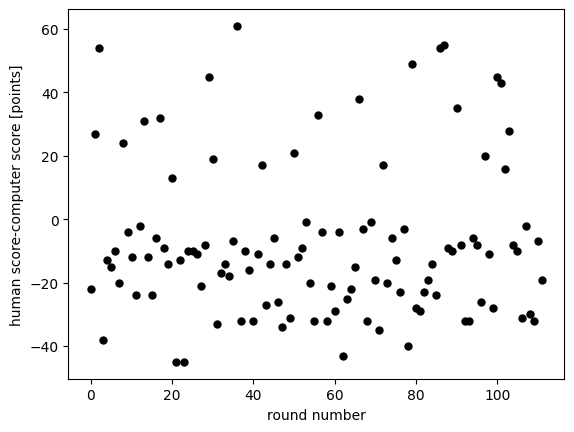

In [10]:
#slect only human
df2=df[df.acting_player==0].groupby(df.round_number).max()
plt.plot(df2.round_number,df2.score_self-df2.score_other,'o',ms=5,color='black') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("round number")
plt.ylabel("human score-computer score [points]")

In the results above it is visible that the human wins (or below 0) partly with only a small adventage while that never happends for then computer. That is because the computer finhss first, when the computer win he has no only the lowest number of points but also the points of the human are doubled causing that there is a gap just over zero. 

Text(0.5, 0, 'human score-computer score [points]')

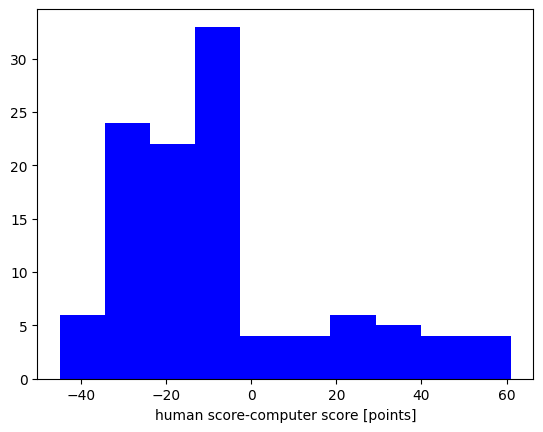

In [11]:
#df2.score_self.plot(kind='hist')
#df2.score_other.plot(kind='hist')
plt.hist(df2.score_self-df2.score_other,color='blue') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("number of occurancies")
plt.xlabel("human score-computer score [points]")

Now I look on full games in level 1, 3 and 5, 7. That is more important because since games is fianl unit of skyjo.

In [33]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files_l1=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l1.sort()
print(list_input_files_l1)

list_input_files_l3=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer3_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l3.sort()
print(list_input_files_l3)

list_input_files_l5=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l5.sort()
print(list_input_files_l5)

list_input_files_l7=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer7_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l7.sort()
print(list_input_files_l7)

list_input_files_l9=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer9_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l9.sort()
print(list_input_files_l9)

list_input_files_l11=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer11_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l11.sort()
print(list_input_files_l11)

['human_computer1_g001.txt', 'human_computer1_g002.txt', 'human_computer1_g003.txt', 'human_computer1_g004.txt', 'human_computer1_g005.txt', 'human_computer1_g006.txt', 'human_computer1_g007.txt', 'human_computer1_g008.txt', 'human_computer1_g009.txt', 'human_computer1_g010.txt', 'human_computer1_g011.txt', 'human_computer1_g012.txt', 'human_computer1_g013.txt', 'human_computer1_g014.txt', 'human_computer1_g015.txt', 'human_computer1_g016.txt', 'human_computer1_g017.txt', 'human_computer1_g018.txt', 'human_computer1_g019.txt', 'human_computer1_g020.txt', 'human_computer1_g021.txt', 'human_computer1_g022.txt', 'human_computer1_g023.txt', 'human_computer1_g024.txt', 'human_computer1_g025.txt', 'human_computer1_g026.txt', 'human_computer1_g027.txt', 'human_computer1_g028.txt', 'human_computer1_g029.txt', 'human_computer1_g030.txt', 'human_computer1_g031.txt', 'human_computer1_g032.txt', 'human_computer1_g033.txt']
['human_computer3_g001.txt', 'human_computer3_g002.txt', 'human_computer3_g

In [34]:
def get_game_stat(file_list,int2):
    resl1=np.zeros((7,len(file_list)))
    deltahuman=0
    deltacomputer=0
    #list of results, currect ones need to 
    for i in range(len(file_list)):
        finfile=np.loadtxt(file_list[i])   
        #get previous also to check that it is doe snot include also old input
        resl1[0,i]=i+1
        #number of turns 
        resl1[4,i]=finfile.shape[1]
        #number of rounds
        resl1[5,i]=finfile[51,finfile.shape[1]-1]+1
        #get scores of all games added together
        scores=np.zeros((2,int(resl1[5,i])))
        for j in range(finfile.shape[1]):
            if finfile[0,j]==0:
                scores[0:2,int(finfile[51,j])]=finfile[49:51,j]
            else:
                scores[0,int(finfile[51,j])]=finfile[50,j]
                scores[1,int(finfile[51,j])]=finfile[49,j]           
        #always player 0, human first 
        resl1[1,i]=sum(scores[0,:])
        resl1[2,i]=sum(scores[1,:])
                    
        if finfile[0,0]==0:
            #human winner mark
            resl1[3,i]=finfile[52,0]
        else:
            resl1[3,i]=finfile[53,0]
        resl1[6,:]=int2     
    return resl1       

In [35]:
resl1=get_game_stat(list_input_files_l1,1)
print("human against computer level 1")
print(f"the human won {int(sum(resl1[3]))} times of {resl1.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl1[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl1[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl1[2]-resl1[1]),3)} points")
print(f"the human wins to {round(np.mean(resl1[3]*100),1)} %")
print("")
resl3=get_game_stat(list_input_files_l3,3)
print("human against computer level 3")
print(f"the human won {int(sum(resl3[3]))} times of {resl3.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl3[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl3[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl3[2]-resl3[1]),3)} points")
print(f"the human wins to {round(np.mean(resl3[3]*100),1)} %")
print("")
resl5=get_game_stat(list_input_files_l5,5)
print("human against computer level 5")
print(f"the human won {int(sum(resl5[3]))} times of {resl5.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl5[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl5[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl5[2]-resl5[1]),3)} points")
print(f"the human wins to {round(np.mean(resl5[3]*100),1)} %")
print(" ")
resl7=get_game_stat(list_input_files_l7,7)
print("human against computer level 7")
print(f"the human won {int(sum(resl7[3]))} times of {resl7.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl7[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl7[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl7[2]-resl7[1]),3)} points")
print(f"the human wins to {round(np.mean(resl7[3]*100),1)} %")
print(" ")
resl9=get_game_stat(list_input_files_l9,9)
print("human against computer level 9")
print(f"the human won {int(sum(resl9[3]))} times of {resl9.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl9[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl9[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl9[2]-resl9[1]),3)} points")
print(f"the human wins to {round(np.mean(resl9[3]*100),1)} %")
print(" ")
resl11=get_game_stat(list_input_files_l11,11)
print("human against computer level 11")
print(f"the human won {int(sum(resl11[3]))} times of {resl11.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl11[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl11[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl11[2]-resl11[1]),3)} points")
print(f"the human wins to {round(np.mean(resl11[3]*100),1)} %")

human against computer level 1
the human won 25 times of 33 rounds
the human average is 82.242 points
the computer average is 111.758 points
the human average adventage is  29.515 points
the human wins to 75.8 %

human against computer level 3
the human won 21 times of 21 rounds
the human average is 54.81 points
the computer average is 150.381 points
the human average adventage is  95.571 points
the human wins to 100.0 %

human against computer level 5
the human won 58 times of 80 rounds
the human average is 89.138 points
the computer average is 110.2 points
the human average adventage is  21.062 points
the human wins to 72.5 %
 
human against computer level 7
the human won 21 times of 21 rounds
the human average is 59.381 points
the computer average is 131.19 points
the human average adventage is  71.81 points
the human wins to 100.0 %
 
human against computer level 9
the human won 20 times of 20 rounds
the human average is 67.45 points
the computer average is 116.05 points
the human 

Text(0, 0.5, 'computer score [points]')

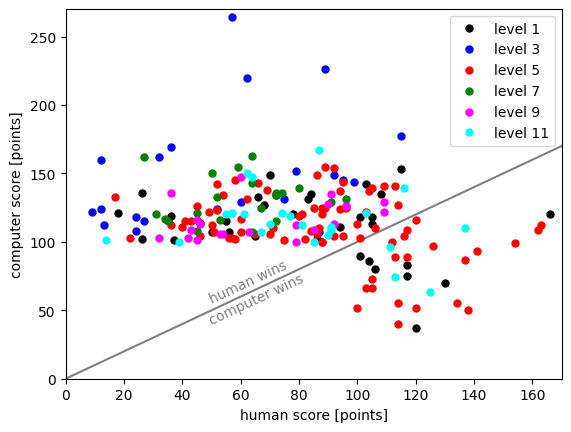

In [36]:
li=[0,300]
plt.plot(li,li,'-',ms=5,color='gray') 
plt.plot(resl1[1,:],resl1[2,:],'o',ms=5,color='black',label='level 1') 
plt.plot(resl3[1,:],resl3[2,:],'o',ms=5,color='blue',label='level 3') 
plt.plot(resl5[1,:],resl5[2,:],'o',ms=5,color='red',label='level 5') 
plt.plot(resl7[1,:],resl7[2,:],'o',ms=5,color='green',label='level 7') 
plt.plot(resl9[1,:],resl9[2,:],'o',ms=5,color='magenta',label='level 9') 
plt.plot(resl11[1,:],resl11[2,:],'o',ms=5,color='cyan',label='level 11') 
plt.text(50, 55, 'human wins', color='gray',rotation=25, rotation_mode='anchor')
plt.text(50, 40, 'computer wins', color='gray',rotation=25, rotation_mode='anchor')
plt.legend(loc="best")
plt.xscale("linear")
plt.xlim(0,170)
plt.ylim(0,270)
plt.xlabel("human score [points]")
plt.ylabel("computer score [points]")

Text(0, 0.5, 'computer-human score [points]')

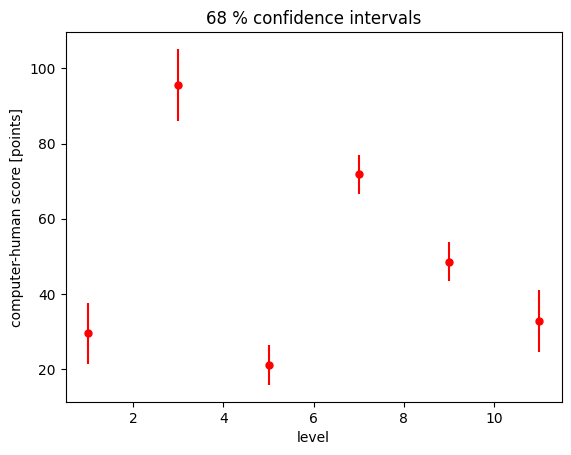

In [37]:
list_res=[resl1,resl3,resl5,resl7,resl9,resl11]
stat=np.zeros((6,len(list_res)))
for i in range(len(list_res)):
    stat[0,i]=list_res[i][6,0]
    stat[1,i]=np.mean(list_res[i][2,:]-list_res[i][1,:])
    stat[2,i]=np.std(list_res[i][2,:]-list_res[i][1,:])/np.sqrt(list_res[i].shape[1])
    stat[3,i]=np.mean(list_res[i][3]) 
    alpha=0.317
    k=int(np.sum(list_res[i][3]))
    n=list_res[i].shape[1]
    p_u, p_o = beta.ppf([alpha/2, 1 - alpha/2], [k, k + 1], [n - k + 1, n - k])
    stat[4,i]=p_u
    stat[5,i]=p_o
    if np.isnan(stat[5,i]):
        stat[5,i]=1
lower_error =  stat[3]-stat[4,:]
upper_error =  stat[5,:]-stat[3]
asymmetric_error = np.array([lower_error,upper_error])
plt.errorbar(stat[0,:],stat[1,:], yerr=stat[2,:],ms=5, fmt='o',color='red')
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("computer-human score [points]")

Text(0, 0.5, '% human wins')

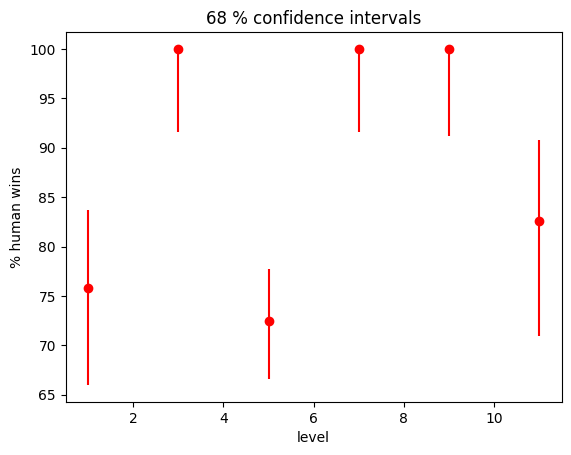

In [38]:
plt.errorbar(stat[0,:],100*stat[3,:], yerr=asymmetric_error*100, fmt='o', color = 'red')   
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("% human wins")

The computer in level 3 and 7 performs worse, the computer never wins there and the average points are also similar. The computer is better in level 1 and 5, it wins about 1/4, enough that the game makes fun. 
There is no improvement of level 5 to 1 visisble. There still could be a small improvement, the errorbars overlap. However it can only be so small that it is an interesting improvement, which would be equal changes for human and computer. 

Level 9 and 11 which are trained on human games (9 imitating humans, 11 the winner in human against comouter games) perform also not so well. Level 9 seems to be always winnable, level 11 is better, but likely still easier than than level 1 and 5. Thus the learning from human experience did not work so well. Likely a contributing factor is that training was difficult with only 279 independent data sets (games or stand alone rounds). 

Below I check how good the models are to predict points in the rounds against humans. 

In [19]:
#columns used in model 
level1_2players_columns=np.loadtxt("xgb_model1_column2.txt")
#the score columns need to be marked back 
sel1=np.copy(level1_2players_columns)
#the score columns set to 1 since need to be output
sel1[49:51]=1

#model file needed to run (is in included in function library not needed here but is so more visible) 
level1_2players_model = XGBRegressor()
level1_2players_model.load_model("xgb_model2.json")
level1_2players_modelb = XGBRegressor()
level1_2players_modelb.load_model("xgb_model3.json")
level1_2players_modelc = XGBRegressor()
level1_2players_modelc.load_model("xgb_model4.json")
print(len(level1_2players_columns),sum(level1_2players_columns))
#get prediction
for_xgb=np.zeros((int(sum(level1_2players_columns)),df.shape[0]))
counter=0
for i in range(len(level1_2players_columns)):
    if level1_2players_columns[i]==1:
        for_xgb[counter]=df.iloc[:,i]
        counter+=1
print(counter)   
print(for_xgb.shape)
print(for_xgb)

51 30.0
30
(30, 3565)
[[ 4.  5. -1. ...  7.  6. 11.]
 [20. -1. 20. ... 20. -1. 20.]
 [20. 20. 20. ... 20.  2. 20.]
 ...
 [30.  2. 30. ... 12. 11.  6.]
 [ 4.  0.  7. ...  4. 11.  4.]
 [ 5. -1.  8. ...  6. 20. 12.]]


In [20]:
res=level1_2players_model.predict(for_xgb.T)
resb=level1_2players_modelb.predict(for_xgb.T)

Text(0.5, 1.0, 'xgboost fitted to random acting computer')

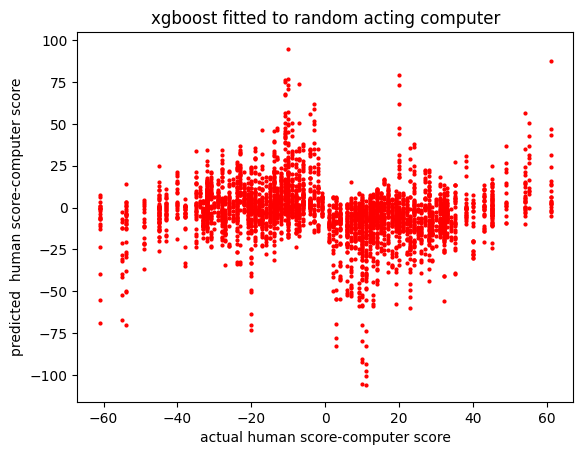

In [21]:
plt.plot( df.score_self-df.score_other,res,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to random acting computer")

Text(0.5, 1.0, 'xgboost fitted to improved acting computer')

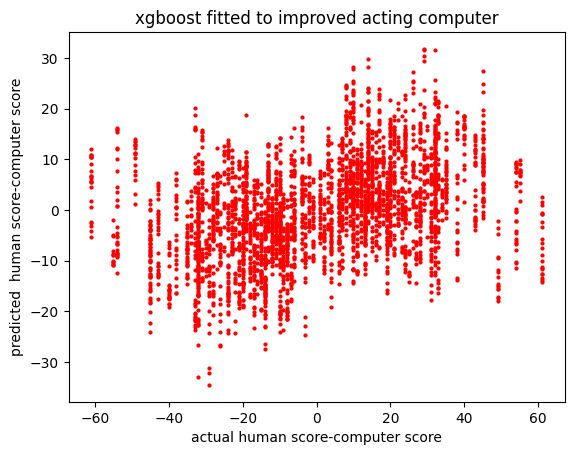

In [22]:
plt.plot( df.score_self-df.score_other,resb,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to improved acting computer")

The model fitted to the improbved acting computer looks clearly better, there is a positivecorrelation visible while there is nothing or a negative correlation visible for the other. 

In [23]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781


The prediction is rather bad for the xgboost model fitted to the random data, when subtracting it from the score increase the standard deviation instead to decrease it as when it worked as it is the case on computer data. The median deviation looks better, there the deviation reduces slightly, thus just a few cases are really badly predicted. 

The similar xgbmodel fitted to improved computer actions fairs better, it reduces most measures of performances

Other ideas use both xgb (more feature engeering on it, change to vanished card n explict feature, likely small N cause a problem) for the next iteration. deep learning only if it is better on the training data.

If that does not decrease predictions, then train on human data, more simple model needed, maybe xgb or linear with good features. 

In [24]:
df['own_n_closed']=df.loc[:,'own_cards_0':'own_cards_11'][df.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df['own_n_open']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=30) & (df.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df['own_max']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df['own_sum']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df['other_player_n_closed']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][df.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df['other_player_n_open']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)
df['other_player_max']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df['other_player_sum']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)


In [25]:
#feature negering to better columns
newcolumns=['open_pile_card', 'own_n_closed', 'own_n_open', 'own_max',
       'own_sum', 'other_player_n_closed', 'other_player_n_open',
       'other_player_max', 'other_player_sum', 'action_take_open', 'action_discard',
       'discard_value','numeric_player_card', 'score_self',
       'score_other', 'round_number']
df2=df.loc[:,newcolumns]
#excloding target columns and round
df3=df.loc[:,newcolumns[0:13]]

In [26]:
resc=level1_2players_modelc.predict(df3)

Text(0.5, 1.0, 'xgboost on feature engering fitted to improved acting computer')

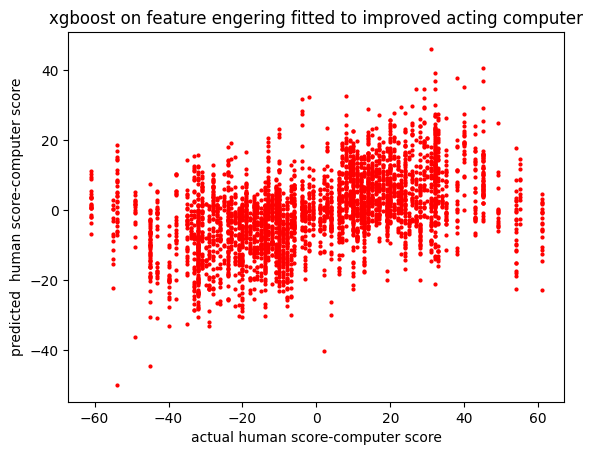

In [27]:
plt.plot( df.score_self-df.score_other,resc,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost on feature engering fitted to improved acting computer")

In [28]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")
print("Model 3")
print(f"standard deviation data-model {np.round(np.std(resc-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resc-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781
Model 3
standard deviation data-model 22.224
median deviation data 16.108


The two xgboost models based on the same data perform somewhat similar, the one using the data directly has a smaller median deviation, the other a smaller deviation deviation. 

In [29]:
feature_train2,feature_test2, target_train2,target_test2=split_test(df2.iloc[:,0:13],df2.score_self-df2.score_other, df2.iloc[:,15],0.6)

2139
2148


In [30]:
ar=do_xgb(feature_train2, target_train2, feature_test2, target_test2,6,reg=0)
print(ar)

xgb took 0.1543 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 27.4042 points
standard deviation of prediction-train 5.689 points
[ 0.          6.          5.68904372 27.40418715]


In [31]:
loop_reg(feature_train2, target_train2, feature_test2, target_test2,4,1,1.414,25,"xgb_human1_maxd04.txt")

doing case 0
xgb took 0.1215 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.7528 points
standard deviation of prediction-train 13.7311 points
doing case 1
xgb took 0.05 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.8047 points
standard deviation of prediction-train 13.9161 points
doing case 2
xgb took 0.2591 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 26.0911 points
standard deviation of prediction-train 13.7356 points
doing case 3
xgb took 0.0834 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.9185 points
standard deviation of prediction-train 13.9202 points
doing case 4
xgb took 0.0496 seconds
standard deviation of test 25.9178 points
sta

In [32]:
hum1=np.loadtxt("xgb_human1_maxd01.txt")
hum2=np.loadtxt("xgb_human1_maxd02.txt")
hum3=np.loadtxt("xgb_human1_maxd03.txt")
hum4=np.loadtxt("xgb_human1_maxd04.txt")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum1[3]),4)} of max-depth=1")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum2[3]),4)} of max-depth=2")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum3[3]),4)} of max-depth=3")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum4[3]),4)} of max-depth=4")

minimum standard deviation of (prediction-test data) 23.4487 of max-depth=1
minimum standard deviation of (prediction-test data) 23.4124 of max-depth=2
minimum standard deviation of (prediction-test data) 23.5616 of max-depth=3
minimum standard deviation of (prediction-test data) 23.7237 of max-depth=4


Text(0, 0.5, 'standard deviation of data-prediction [points]')

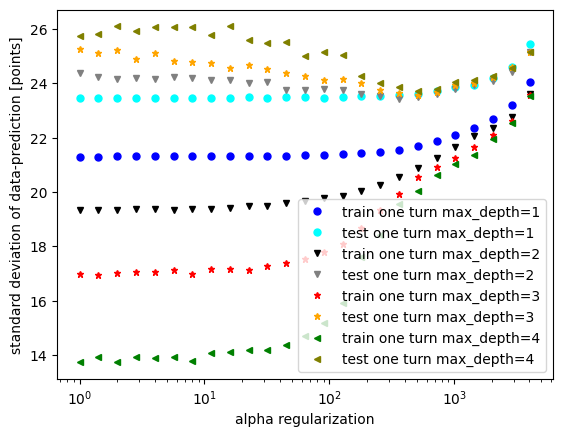

In [33]:
plt.plot(hum1[0],hum1[2],'o',ms=5,color='blue',label='train one turn max_depth=1') 
plt.plot(hum1[0],hum1[3],'o',ms=5,color='cyan',label='test one turn max_depth=1')
plt.plot(hum2[0],hum2[2],'v',ms=5,color='black',label='train one turn max_depth=2') 
plt.plot(hum2[0],hum2[3],'v',ms=5,color='gray',label='test one turn max_depth=2')
plt.plot(hum3[0],hum3[2],'*',ms=5,color='red',label='train one turn max_depth=3') 
plt.plot(hum3[0],hum3[3],'*',ms=5,color='orange',label='test one turn max_depth=3')
plt.plot(hum4[0],hum4[2],'<',ms=5,color='green',label='train one turn max_depth=4') 
plt.plot(hum4[0],hum4[3],'<',ms=5,color='olive',label='test one turn max_depth=4')
plt.legend(loc="best")
plt.xscale("log")
#plt.ylim(55,65)
plt.xlabel("alpha regularization")
plt.ylabel("standard deviation of data-prediction [points]")

Taring an xgboost model on the human is worse in the prediction than both models trained on advanced computer settings. 

I could explore more complicated models but could also first implement the otehr xgbbosst, espeically the one
without feature engering needs just a different input file as name. 

In [34]:
#check how model in actual application fares
#linear regression on each action option separately?  a lot of work and seem not machine learning
print(df2)
dftake=df2[df2.action_take_open==1]

      open_pile_card  own_n_closed  own_n_open  own_max  own_sum  \
0                4.0            10           2      8.0     13.0   
1                5.0            10           2      1.0      0.0   
2               -1.0            10           2      8.0     12.0   
3                8.0            10           2      2.0      3.0   
4                2.0            10           2      4.0      3.0   
...              ...           ...         ...      ...      ...   
3560            10.0             2          10     12.0     28.0   
3561            12.0             1          11      8.0     41.0   
3562             7.0             2          10      6.0     22.0   
3563             6.0             1           8      8.0     24.0   
3564            11.0             2          10     12.0     28.0   

      other_player_n_closed  other_player_n_open  other_player_max  \
0                        10                    2               1.0   
1                        10                

In [35]:
print(level1_2players_model.feature_importances_.shape,df.shape)
print(level1_2players_modelb.feature_importances_)

(30,) (3565, 60)
[0.20022598 0.00963422 0.11840304 0.00660788 0.01313902 0.0138765
 0.00815738 0.0077707  0.00912716 0.00465302 0.013208   0.03226249
 0.01348601 0.01038121 0.12892811 0.01242334 0.00744092 0.01283619
 0.00913652 0.00782426 0.0077482  0.00451147 0.01120893 0.02889716
 0.01112024 0.153542   0.00087686 0.00638651 0.12962395 0.00656274]


In [36]:
columns=['open_pile_card']
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card')     
for i in range(24,30):
    print(i)
    print(columns[i])
print(len(columns))

24
other_player_cards_11
25
action_take_open
26
action_discard
27
discard_value
28
id_player_card
29
numeric_player_card
30


fitting random data
open_pile_card has importance 0.0117
action_take_open has importance 0.0658
discard_value has importance 0.0133
id_player_card has importance 0.0079
fitting level 1 data
open_pile_card has importance 0.2002
own_cards_1 has importance 0.1184
own_cards_10 has importance 0.0323
other_player_cards_1 has importance 0.1289
other_player_cards_10 has importance 0.0289
action_take_open has importance 0.1535
id_player_card has importance 0.1296


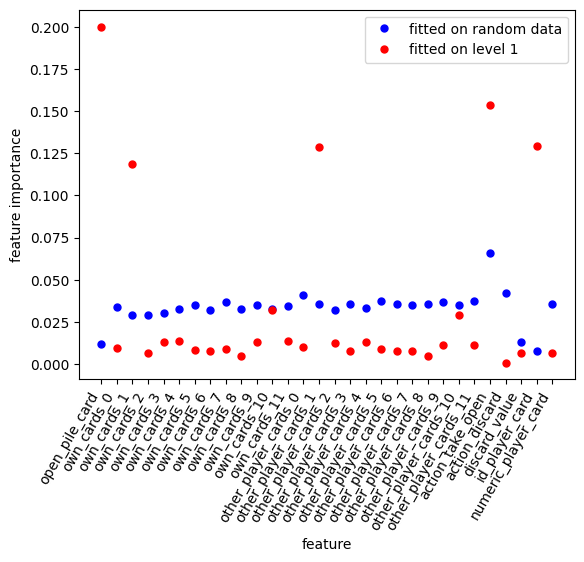

In [36]:
plt.plot(columns[0:30],level1_2players_model.feature_importances_,'o',ms=5,color='blue',label='fitted on random data') 
plt.plot(columns[0:30],level1_2players_modelb.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting random data")
for i in range(30):
    if abs(level1_2players_model.feature_importances_[i]-np.median(level1_2players_model.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_model.feature_importances_[i],4)))
 
print("fitting level 1 data")
for i in range(30):
    if abs(level1_2players_modelb.feature_importances_[i]-np.median(level1_2players_modelb.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_modelb.feature_importances_[i],4)))
    

In the first fit which is done on the random data the vast majority features has about the same importance. 
Less importance has the open card, the value of the discarded card and least the id of the choosen card. The only feature with larger importance is the whether the open card is used. 
That seems plausible, most are equally importance, the id is truly less imprortant usually and whether the open card has a lot of importance on the following actions.

In contrast a lot is different for the model fitted to level 1 (which has less depth and fits more correlated data), most have nearlz no importance. Take action stazs important but beides also not so plasuible also 4 player cards (that both player contribute the same can be understood since who is who changes from turn to turn) and the id of used card. That the value of the open is used is plausible, since it matters at least closer to the end of the game. 
Still overall it makes less sense, and thus it is not surprising that implementing it does not lead to improvements. 

fitting level 1 data with features
open_pile_card has importance 0.0178
own_n_closed has importance 0.2736
own_n_open has importance 0.0091
own_sum has importance 0.1182
other_player_n_closed has importance 0.2667
other_player_n_open has importance 0.0131
other_player_sum has importance 0.1163
action_take_open has importance 0.0199
action_discard has importance 0.0141
numeric_player_card has importance 0.0582


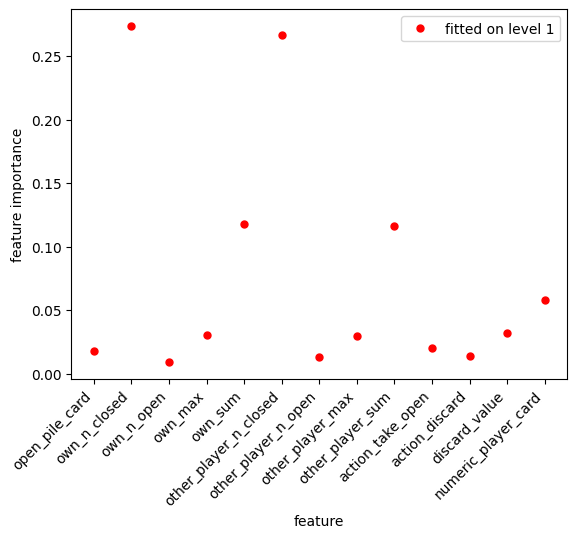

In [37]:
plt.plot(newcolumns[0:13],level1_2players_modelc.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting level 1 data with features")
for i in range(13):
    if abs(level1_2players_modelc.feature_importances_[i]-np.median(level1_2players_modelc.feature_importances_))>0.01:
        print(newcolumns[i]+" has importance "+str(round(level1_2players_modelc.feature_importances_[i],4)))
    

Here it looks more plausibel again. Most important are the sum of the card values and how many or open, since the the differential score is approximate: own_sum+own_n_closed*avg_value-(other_player_sum+other_player_n_closed*avg_value)

The next important is the player card given, which is the next important, because it always matters.

That n_open has the smallest importance makes sense since it is just reverse of closed always besides for vanishing cards, and it is not expected that those importance can be discovered here.  

Reason for no improvement could be that the system fits too much the past xgboost model which helps for predicting future
but possible not for winning. Using first level data which is more random in a better moredl could help agaoinst that. 


New Idea

Human imitation. Now predicting which card was used. First for all human actions. Later possible restricting to won games, could add other wins to it.

Both rounds and games are used. 

In [41]:
list_all=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer')) and os.path.isfile(os.path.join(myPath, f))]
#randomness wanted that test train have random subsets of it since splitting is not random 
random.shuffle(list_all)
print(len(list_all))
#used for first on human training were 279 games/stand alone rounds

335


In [39]:
#get all columns for now, add also win worker
#first get number of rows 
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])
    cc+=a.shape[1]
print(cc)  
all_hu_com=np.zeros((55,int(cc)))
#55 is number of data entry
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])    
    #rounds
    if a.shape[0]==51:
        all_hu_com[0:51,cc:cc+a.shape[1]]=a
        #rounds
        all_hu_com[51,cc:cc+a.shape[1]]=0
        #not fats but not big here
        for j in range(a.shape[1]):
            if a[49,j]<a[50,j]:
                all_hu_com[52,cc+j]=1
            else:
                all_hu_com[53,cc+j]=1
    else:            
         all_hu_com[0:54,cc:cc+a.shape[1]]=a   
    all_hu_com[54,cc:cc+a.shape[1]]=i        
    cc+=a.shape[1]     
    

20385


In [40]:
#column names 
columns2=['acting_player']
columns2.append('open_pile_card')
for i in range(15):
    columns2.append('number_of_'+str(i-2)+'_in_open')
columns2.append('number_of_cards_in_closed')
for i in range(12):
    columns2.append('own_cards_'+str(i))
for i in range(12):
    columns2.append('other_player_cards_'+str(i))    
columns2.append('action_take_open')
columns2.append('action_discard')
columns2.append('discard_value')
columns2.append('id_player_card')
columns2.append('numeric_player_card') 
columns2.append('vanish_marker')
columns2.append('turn')
columns2.append('score_self')
columns2.append('score_other')
columns2.append('round_number')
columns2.append('winner_self')
columns2.append('winner_other')
columns2.append('entry_number')
print(len(columns2),columns2)

55 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [41]:
df_hum_com = pd.DataFrame(data = all_hu_com.T, index=range(all_hu_com.shape[1]),columns = columns2)
print(df_hum_com.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            1.0             3.0                   0.0                   0.0   
1            0.0             8.0                   0.0                   0.0   
2            1.0             9.0                   0.0                   0.0   
3            0.0             1.0                   0.0                   0.0   
4            1.0             3.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  1.0                  5.0   
1                  0.0                  1.0                  5.0   
2                  0.0                  1.0                  5.0   
3                  0.0                  1.0                  5.0   
4                  0.0                  1.0                  5.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  1.0               

Select human, human who wins and all winners now.

In [42]:
#select human is first player
df_hum=df_hum_com[df_hum_com.acting_player==0]
#human wins
df_hum_win=df_hum_com[(df_hum_com.acting_player==0) & (df_hum_com.winner_self==1)]
#all wins
df_win=df_hum_com[ (df_hum_com.winner_self==1)]
print(df_hum.shape,df_hum_win.shape,df_win.shape)


(9997, 55) (7973, 55) (10069, 55)


Now I get some sumarizing columns for the player cards, since it is clear that for using single card information
there were not enough games. 

In [43]:
#get average value of cards
weight_vec=np.array([5/150,10/150,15/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150]) 
vals=np.array(range(-2,13))

av_value=np.dot(vals,weight_vec)
#average vale of card
print(f"average value is {av_value}")
df_hum['own_n_closed']=df_hum.loc[:,'own_cards_0':'own_cards_11'][df_hum.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df_hum['own_n_open']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum['own_sum']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum['own_max']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum['other_player_n_closed']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum['other_player_n_open']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum['other_player_sum']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum['other_player_max']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
#replace placeholder with for closed with avg_value
df_hum['value_player_card']=df_hum['numeric_player_card']
df_hum.value_player_card[df_hum.numeric_player_card==20]=av_value

#now same for human wins
df_hum_win['own_n_closed']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][df_hum_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_hum_win['own_n_open']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum_win['own_sum']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum_win['own_max']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum_win['other_player_n_closed']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum_win['other_player_n_open']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum_win['other_player_sum']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum_win['other_player_max']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_hum_win['value_player_card']=df_hum_win['numeric_player_card']
df_hum_win.value_player_card[df_hum_win.numeric_player_card==20]=av_value


#now same for wins
df_win['own_n_closed']=df_win.loc[:,'own_cards_0':'own_cards_11'][df_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_win['own_n_open']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_win['own_sum']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_win['own_max']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_win['other_player_n_closed']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_win['other_player_n_open']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_win['other_player_sum']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_win['other_player_max']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_win['value_player_card']=df_win['numeric_player_card']
df_win.value_player_card[df_win.numeric_player_card==20]=av_value

#now selecting no take_open to train on discard action 
df_hum_discard=df_hum[df_hum.action_take_open==0]
df_win_discard=df_win[df_win.action_take_open==0]
df_hum_win_discard=df_hum_win[df_hum_win.action_take_open==0]

#now selecting not closed discrad actions 
df_hum_value=df_hum[df_hum.action_discard==0]
df_win_value=df_win[df_win.action_discard==0]
df_hum_win_value=df_hum_win[df_hum_win.action_discard==0]

average value is 5.066666666666666


Now I am looking on correlations. 

In [44]:
#s1 corr(s2, method='pearson')
corrs=df_hum.corr('pearson')
#now only wins 
corrs_hum_win=df_hum_win.corr('pearson')
corrs_win=df_win.corr('pearson')
#only using discard actions
corrs_discard=df_hum_discard.corr('pearson')
#now only wins 
corrs_hum_win_discard=df_hum_win_discard.corr('pearson')
corrs_win_discard=df_win_discard.corr('pearson')
#only using not needing to take closed actions
corrs_value=df_hum_value.corr('pearson')
#now only wins 
corrs_hum_win_value=df_hum_win_value.corr('pearson')
corrs_win_value=df_win_value.corr('pearson')

open_pile_card
 human  has correlation of -0.7277
 human wins has correlation of -0.7363
 wins has correlation of -0.738
own_cards_0
 human  has correlation of 0.0927
 human wins has correlation of 0.1001
 wins has correlation of 0.0845
action_discard
 human  has correlation of -0.4891
 human wins has correlation of -0.4897
 wins has correlation of -0.4492
discard_value
 human  has correlation of 0.9564
 human wins has correlation of 0.9573
 wins has correlation of 0.954
numeric_player_card
 human  has correlation of -0.163
 human wins has correlation of -0.1551
 wins has correlation of -0.1367
vanish_marker
 human  has correlation of 0.114
 human wins has correlation of 0.1099
 wins has correlation of 0.1045
other_player_sum
 human  has correlation of -0.0433
 human wins has correlation of -0.078
 wins has correlation of -0.1172
other_player_max
 human  has correlation of -0.1366
 human wins has correlation of -0.1203
 wins has correlation of -0.1511


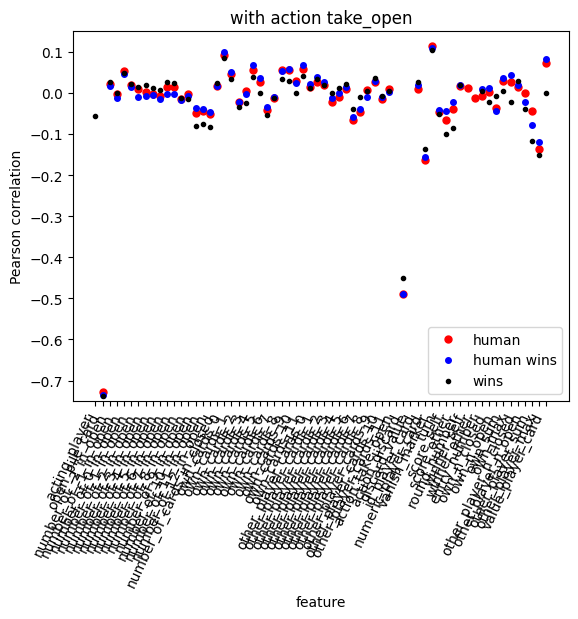

In [45]:
plt.plot(df_hum.columns,corrs.action_take_open,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win.action_take_open,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win.action_take_open,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.75,0.15)
plt.xticks(rotation=65, ha='right')
plt.title("with action take_open")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs.action_take_open[i]<1 and  (abs(corrs.action_take_open[i])>0.10 or abs(corrs_hum_win.action_take_open[i])>0.10 or  abs(corrs_win.action_take_open[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs.action_take_open[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win.action_take_open[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win.action_take_open[i],4)}")     

Some of the action happen only after take_action is decided like discard, x_player_card, score_x thus they should be ignored. Also vanish_marker cannot be just used because it happens only after it. However, the possibility of it could (and likely should be when just one exchange is missing) be predicted.

The strongest correlation is with the open card value as expected. All others are clearly less important, the next important is other_player_max

Now looking on discard action , thewre only cases the open pile card is not uswd are considered.

discard_value
 human  has correlation of 0.7179
 human wins has correlation of 0.7403
 wins has correlation of 0.6345
numeric_player_card
 human  has correlation of 0.5815
 human wins has correlation of 0.5631
 wins has correlation of 0.6149
vanish_marker
 human  has correlation of -0.1372
 human wins has correlation of -0.1454
 wins has correlation of -0.1145
score_self
 human  has correlation of 0.1246
 human wins has correlation of 0.1309
 wins has correlation of 0.0301
own_max
 human  has correlation of -0.1167
 human wins has correlation of -0.1183
 wins has correlation of -0.1774
value_player_card
 human  has correlation of -0.3313
 human wins has correlation of -0.3032
 wins has correlation of -0.3469


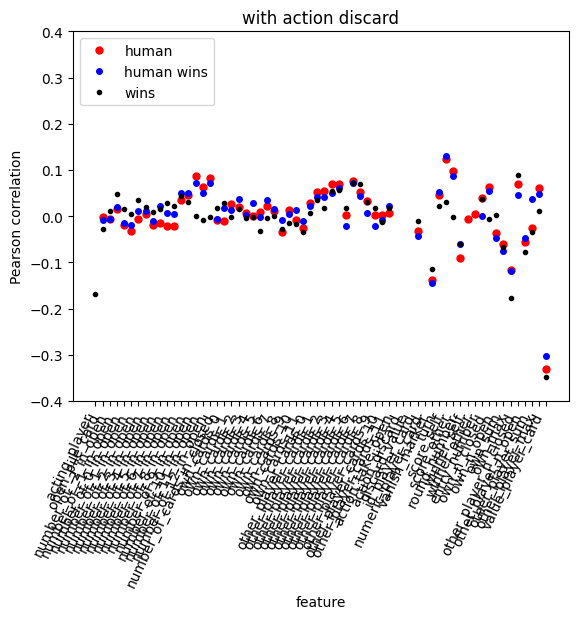

In [46]:
plt.plot(df_hum.columns,corrs_discard.action_discard,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win_discard.action_discard,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win_discard.action_discard,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.4,0.4)
plt.xticks(rotation=65, ha='right')
plt.title("with action discard")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_discard.action_discard[i]<1 and  (abs(corrs_discard.action_discard[i])>0.10 or abs(corrs_hum_win_discard.action_discard[i])>0.10 or  abs(corrs_win_discard.action_discard[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_discard.action_discard[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_discard.action_discard[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_discard.action_discard[i],4)}")     

The x_player card is happening afterwards in a turn. As expected dicard value has the strongest correlation since it depends from that value which action is the best. 

Below then the corrdlelation with played card ignoring the cases when a closed one needed to be taken. In two variants, first closed card are 20, then they are 5.07 which they are in average. 

open_pile_card
 human  has correlation of 0.1788
 human wins has correlation of 0.1393
 wins has correlation of 0.2029
number_of_3_in_open
 human  has correlation of -0.1053
 human wins has correlation of -0.0834
 wins has correlation of -0.1217
number_of_4_in_open
 human  has correlation of -0.1175
 human wins has correlation of -0.1073
 wins has correlation of -0.1358
number_of_10_in_open
 human  has correlation of 0.1305
 human wins has correlation of 0.0791
 wins has correlation of 0.1899
number_of_11_in_open
 human  has correlation of 0.1253
 human wins has correlation of 0.0783
 wins has correlation of 0.1743
number_of_12_in_open
 human  has correlation of 0.1287
 human wins has correlation of 0.0789
 wins has correlation of 0.1849
own_cards_2
 human  has correlation of 0.1029
 human wins has correlation of 0.094
 wins has correlation of 0.1153
own_cards_6
 human  has correlation of 0.083
 human wins has correlation of 0.0747
 wins has correlation of 0.1229
action_take_open
 huma

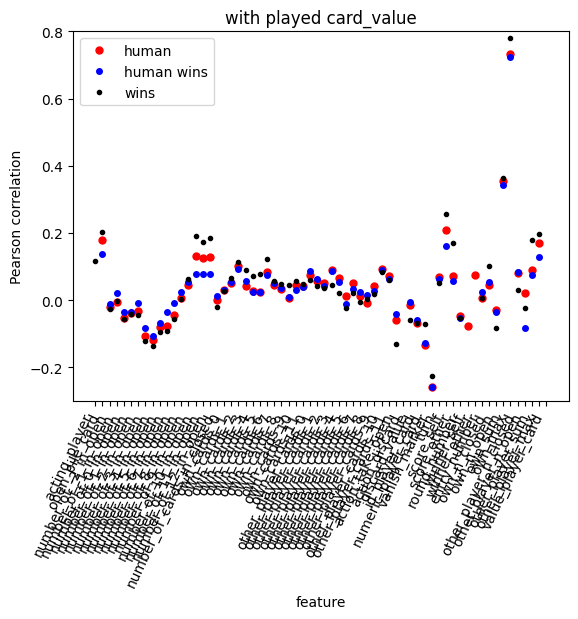

In [47]:
plt.plot(df_hum.columns,corrs_value.value_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win_value.value_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win_value.value_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.8)
plt.xticks(rotation=65, ha='right')
plt.title("with played card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_value.value_player_card[i]<1 and  (abs(corrs_value.value_player_card[i])>0.10 or abs(corrs_hum_win_value.value_player_card[i])>0.10 or  abs(corrs_win_value.value_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_value.value_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_value.value_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_value.value_player_card[i],4)}")   

open_pile_card
 human  has correlation of -0.1162
 human wins has correlation of -0.1136
 wins has correlation of -0.1314
number_of_5_in_open
 human  has correlation of -0.0994
 human wins has correlation of -0.1047
 wins has correlation of -0.0998
number_of_8_in_open
 human  has correlation of -0.1146
 human wins has correlation of -0.1048
 wins has correlation of -0.0958
number_of_10_in_open
 human  has correlation of -0.1518
 human wins has correlation of -0.127
 wins has correlation of -0.1393
number_of_11_in_open
 human  has correlation of -0.1501
 human wins has correlation of -0.1279
 wins has correlation of -0.1426
number_of_12_in_open
 human  has correlation of -0.1839
 human wins has correlation of -0.1742
 wins has correlation of -0.173
number_of_cards_in_closed
 human  has correlation of 0.1117
 human wins has correlation of 0.0964
 wins has correlation of 0.1074
own_cards_0
 human  has correlation of 0.1381
 human wins has correlation of 0.1647
 wins has correlation of 0.1

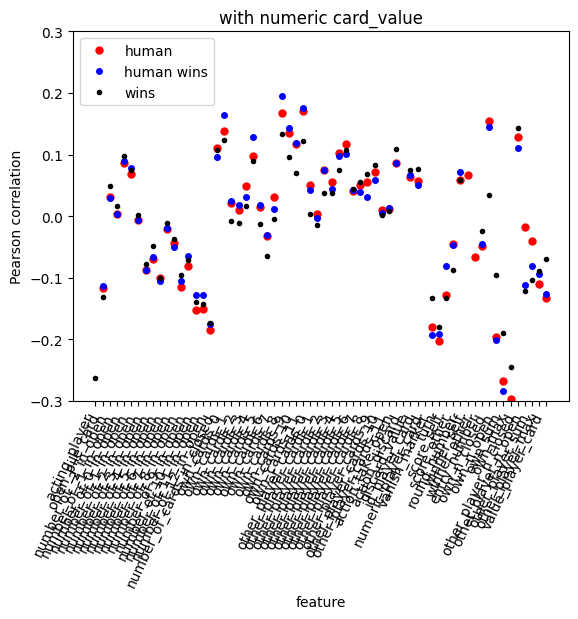

In [48]:
plt.plot(df_hum_value.columns,corrs_value.numeric_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win_value.columns,corrs_hum_win_value.numeric_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win_value.columns,corrs_win_value.numeric_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.3)
plt.xticks(rotation=65, ha='right')
plt.title("with numeric card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_value.numeric_player_card[i]<1 and  (abs(corrs_value.numeric_player_card[i])>0.10 or abs(corrs_hum_win_value.numeric_player_card[i])>0.10 or  abs(corrs_win_value.numeric_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_value.numeric_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_value.numeric_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_value.numeric_player_card[i],4)}")  

Both are similar, likely value is better, since there are at most very small effects when the card is closed when taking it. 

Again the most connectedness ones the action parts before and some not knowable are important, but the player card summarizing
numbers are also more important now, especiually teh maximum value of the own card set. 

Selecting some features which matter more likely for trying xgboost first for take_open.

In [49]:
print(df_hum.columns)
col_sel1=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','action_take_open','entry_number']
df_hum_sel=df_hum.loc[:,col_sel1]
df_hum_win_sel=df_hum_win.loc[:,col_sel1]
df_win_sel=df_win.loc[:,col_sel1]
#selection for discard
col_sel2=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','discard_value','action_discard','entry_number']
df_hum_sel_discard=df_hum_discard.loc[:,col_sel2]
df_hum_win_sel_discard=df_hum_win_discard.loc[:,col_sel2]
df_win_sel_discard=df_win_discard.loc[:,col_sel2]
#start next is selecting the ones for card value, include action_open (but not other) because only one of
#discard is possible 
#target is value_card and it is regression since it are points 
col_sel3=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','action_take_open','discard_value','value_player_card','entry_number']
print(len(col_sel3))
df_hum_sel_value=df_hum_value.loc[:,col_sel3]
df_hum_win_sel_value=df_hum_win_value.loc[:,col_sel3]
df_win_sel_value=df_win_value.loc[:,col_sel3]

Index(['acting_player', 'open_pile_card', 'number_of_-2_in_open',
       'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open',
       'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open',
       'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open',
       'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open',
       'number_of_11_in_open', 'number_of_12_in_open',
       'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1',
       'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5',
       'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9',
       'own_cards_10', 'own_cards_11', 'other_player_cards_0',
       'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3',
       'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6',
       'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9',
       'other_player_cards_10', 'other_player_cards_11', 'action_take_ope

In [50]:
#now splitting
df_hum_train,df_hum_test= train_test_split(df_hum_sel,train_size=0.60, shuffle=True, random_state=1)
df_hum_win_train,df_hum_win_test= train_test_split(df_hum_win_sel,train_size=0.60, shuffle=True, random_state=1)
df_win_train,df_win_test= train_test_split(df_win_sel,train_size=0.60, shuffle=True, random_state=1)
print(df_hum_win_train.shape)
#better splitting of games/round each is only in one sample, they are more similar than random results 
df_win_feature_train2,df_win_feature_test2,df_win_target_train2,df_win_target_test2=split_test(df_win_sel.iloc[:,0:9],df_win_sel.iloc[:,9], df_win_sel.iloc[:,10],0.6)
df_hum_feature_train2,df_hum_feature_test2,df_hum_target_train2,df_hum_target_test2=split_test(df_hum_sel.iloc[:,0:9],df_hum_sel.iloc[:,9], df_hum_sel.iloc[:,10],0.6)
df_hum_win_feature_train2,df_hum_win_feature_test2,df_hum_win_target_train2,df_hum_win_target_test2=split_test(df_hum_win_sel.iloc[:,0:9],df_hum_win_sel.iloc[:,9], df_hum_win_sel.iloc[:,10],0.6)
#now for discard 
df_win_feature_train2_discard,df_win_feature_test2_discard,df_win_target_train2_discard,df_win_target_test2_discard=split_test(df_win_sel_discard.iloc[:,0:10],df_win_sel_discard.iloc[:,10], df_win_sel_discard.iloc[:,11],0.6)
df_hum_feature_train2_discard,df_hum_feature_test2_discard,df_hum_target_train2_discard,df_hum_target_test2_discard=split_test(df_hum_sel_discard.iloc[:,0:10],df_hum_sel_discard.iloc[:,10], df_hum_sel_discard.iloc[:,11],0.6)
df_hum_win_feature_train2_discard,df_hum_win_feature_test2_discard,df_hum_win_target_train2_discard,df_hum_win_target_test2_discard=split_test(df_hum_win_sel_discard.iloc[:,0:10],df_hum_win_sel_discard.iloc[:,10], df_hum_win_sel_discard.iloc[:,11],0.6)
#now for value
df_win_feature_train2_value,df_win_feature_test2_value,df_win_target_train2_value,df_win_target_test2_value=split_test(df_win_sel_value.iloc[:,0:11],df_win_sel_value.iloc[:,11], df_win_sel_value.iloc[:,12],0.6)
df_hum_feature_train2_value,df_hum_feature_test2_value,df_hum_target_train2_value,df_hum_target_test2_value=split_test(df_hum_sel_value.iloc[:,0:11],df_hum_sel_value.iloc[:,11], df_hum_sel_value.iloc[:,12],0.6)
df_hum_win_feature_train2_value,df_hum_win_feature_test2_value,df_hum_win_target_train2_value,df_hum_win_target_test2_value=split_test(df_hum_win_sel_value.iloc[:,0:11],df_hum_win_sel_value.iloc[:,11], df_hum_win_sel_value.iloc[:,12],0.6)
print(df_hum_win_feature_train2_value.head())

(4783, 11)
6041
6054
5998
5998
4784
4810
4102
4131
4011
4031
3184
3224
4235
4242
4045
4071
3238
3240
     open_pile_card  own_n_closed  own_n_open  own_sum  own_max  \
404             4.0             9           3     23.0     10.0   
406             6.0             9           3     17.0     10.0   
408            -1.0             9           3      7.0      4.0   
410             6.0             8           4      6.0      4.0   
414             0.0             6           6     18.0     11.0   

     other_player_n_closed  other_player_n_open  other_player_sum  \
404                     10                    2               2.0   
406                      9                    3               3.0   
408                      9                    3              10.0   
410                      9                    3              11.0   
414                      8                    4              14.0   

     other_player_max  action_take_open  discard_value  
404               3.0   

[[3978   17]
 [  33 1970]]


(<AxesSubplot:title={'center':'train'}>, Text(0.5, 1.0, 'train'))

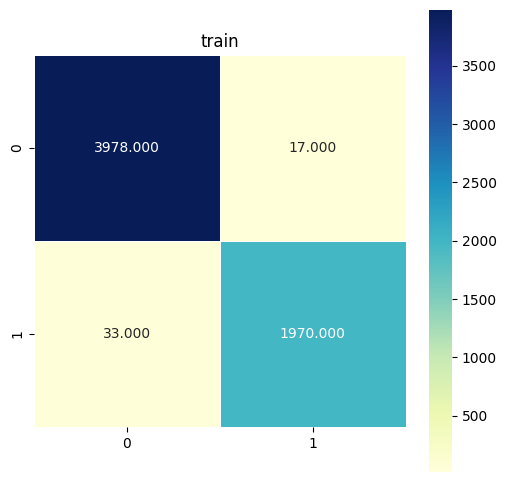

In [51]:
#now using better splitting
open1=XGBClassifier().fit(df_hum_feature_train2,df_hum_target_train2)
pred_te=open1.predict(df_hum_feature_test2)
pred_tr=open1.predict(df_hum_feature_train2)
conf_train = confusion_matrix(df_hum_target_train2, pred_tr)
conf_test = confusion_matrix(df_hum_target_test2, pred_te)
print(conf_train)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("train")

[[2555  135]
 [ 165 1144]]


(<AxesSubplot:title={'center':'test'}>, Text(0.5, 1.0, 'test'))

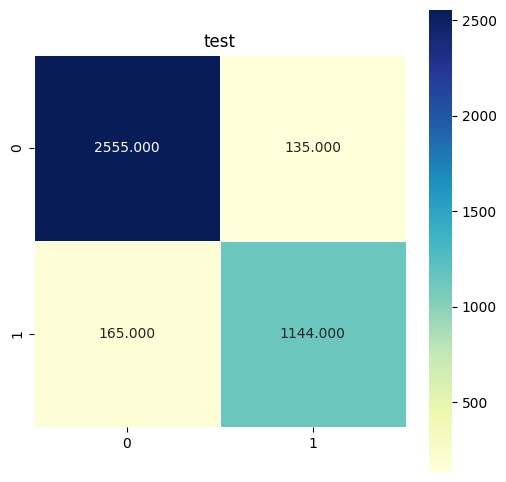

In [52]:
print(conf_test)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("test")

In [53]:
#return fraction of wrong predicted
def perwrong(conf_matrix):
    return 1-(np.sum(conf_matrix)-conf_matrix[0,1]-conf_matrix[1,0])/np.sum(conf_matrix)

In [54]:
#percentage wrong as measure
train_wrong=perwrong(conf_train)
print(train_wrong)
test_wrong=perwrong(conf_test)
print(test_wrong)

0.008336112037345744
0.07501875468867214


There is some overfitting, but it is relevant improvemnt, but need to look on confusion matrix.

Testing do_xgb_class

In [55]:
ar=do_xgb_class(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9],df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],max_depth=5,reg=10)
print(ar)

xgb took 0.1314 seconds
percentage wrong test 8.88
percentage wrong train 6.99 
[10.          5.          0.06985662  0.08877219]


In [56]:
#do 1 to 8 always since sample changes often and it is fats enouygh
for i in range(1,9):
    loop_reg(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9], df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],i,0.1,1.414,20,'take_open_human_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.121 seconds
percentage wrong test 9.43
percentage wrong train 8.54 
doing case 1
xgb took 0.0385 seconds
percentage wrong test 9.35
percentage wrong train 8.6 
doing case 2
xgb took 0.0558 seconds
percentage wrong test 9.35
percentage wrong train 8.6 
doing case 3
xgb took 0.0402 seconds
percentage wrong test 9.35
percentage wrong train 8.6 
doing case 4
xgb took 0.0385 seconds
percentage wrong test 9.38
percentage wrong train 8.59 
doing case 5
xgb took 0.0419 seconds
percentage wrong test 9.4
percentage wrong train 8.57 
doing case 6
xgb took 0.0548 seconds
percentage wrong test 9.33
percentage wrong train 8.59 
doing case 7
xgb took 0.0408 seconds
percentage wrong test 9.4
percentage wrong train 8.54 
doing case 8
xgb took 0.0405 seconds
percentage wrong test 9.38
percentage wrong train 8.55 
doing case 9
xgb took 0.0398 seconds
percentage wrong test 9.43
percentage wrong train 8.54 
doing case 10
xgb took 0.0551 seconds
percentage wrong test 9.43
percentage 

xgb took 1.5 seconds
percentage wrong test 7.78
percentage wrong train 2.75 
doing case 9
xgb took 3.2604 seconds
percentage wrong test 7.35
percentage wrong train 3.33 
doing case 10
xgb took 2.4206 seconds
percentage wrong test 8.13
percentage wrong train 4.2 
doing case 11
xgb took 0.7427 seconds
percentage wrong test 7.95
percentage wrong train 5.0 
doing case 12
xgb took 0.4931 seconds
percentage wrong test 8.35
percentage wrong train 5.89 
doing case 13
xgb took 0.0966 seconds
percentage wrong test 8.93
percentage wrong train 6.79 
doing case 14
xgb took 0.088 seconds
percentage wrong test 9.08
percentage wrong train 7.5 
doing case 15
xgb took 0.0813 seconds
percentage wrong test 8.98
percentage wrong train 7.77 
doing case 16
xgb took 0.0923 seconds
percentage wrong test 9.43
percentage wrong train 8.2 
doing case 17
xgb took 0.092 seconds
percentage wrong test 9.08
percentage wrong train 8.19 
doing case 18
xgb took 0.0739 seconds
percentage wrong test 9.43
percentage wrong tr

Text(0, 0.5, '% wrong')

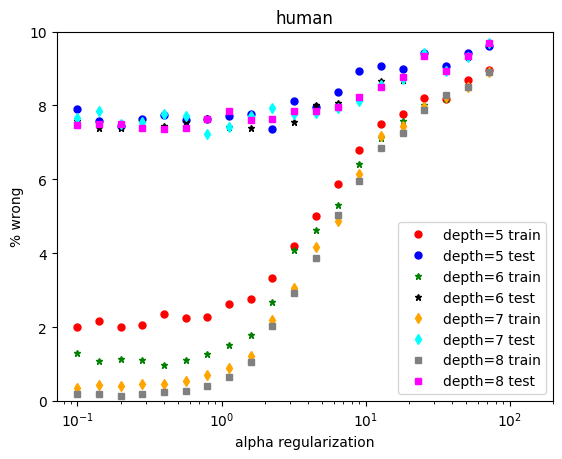

In [57]:
take5=np.loadtxt('take_open_human_xgb_depth5.txt')
take6=np.loadtxt('take_open_human_xgb_depth6.txt')
take7=np.loadtxt('take_open_human_xgb_depth7.txt')
take8=np.loadtxt('take_open_human_xgb_depth8.txt')
plt.plot(take5[0,:],100*take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5[0,:],100*take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6[0,:],100*take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6[0,:],100*take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7[0,:],100*take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7[0,:],100*take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8[0,:],100*take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8[0,:],100*take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

The differences in test seem to be very small, besides that beyound some regularization it gets worse. Not clear what is bets, should also look into logistic.

Now looking on games being only in training or test or in both.

In [58]:
#now separating test and train by separate games 
for i in range(1,9):
    loop_reg(df_hum_feature_train2,df_hum_target_train2,df_hum_feature_test2,df_hum_target_test2,i,0.1,1.414,30,'take_open_hum2_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1439 seconds
percentage wrong test 9.95
percentage wrong train 8.37 
doing case 1
xgb took 0.1311 seconds
percentage wrong test 9.95
percentage wrong train 8.35 
doing case 2
xgb took 0.0638 seconds
percentage wrong test 9.93
percentage wrong train 8.55 
doing case 3
xgb took 0.0412 seconds
percentage wrong test 9.93
percentage wrong train 8.57 
doing case 4
xgb took 0.0411 seconds
percentage wrong test 10.13
percentage wrong train 8.7 
doing case 5
xgb took 0.0546 seconds
percentage wrong test 10.13
percentage wrong train 8.72 
doing case 6
xgb took 0.0419 seconds
percentage wrong test 9.9
percentage wrong train 8.44 
doing case 7
xgb took 0.0428 seconds
percentage wrong test 9.95
percentage wrong train 8.42 
doing case 8
xgb took 0.1045 seconds
percentage wrong test 9.98
percentage wrong train 8.55 
doing case 9
xgb took 0.0727 seconds
percentage wrong test 10.15
percentage wrong train 8.69 
doing case 10
xgb took 0.0853 seconds
percentage wrong test 10.15
per

xgb took 0.0782 seconds
percentage wrong test 32.73
percentage wrong train 33.39 
doing case 0
xgb took 0.1865 seconds
percentage wrong test 7.45
percentage wrong train 3.58 
doing case 1
xgb took 0.1558 seconds
percentage wrong test 7.9
percentage wrong train 3.55 
doing case 2
xgb took 0.5949 seconds
percentage wrong test 7.8
percentage wrong train 3.77 
doing case 3
xgb took 0.1354 seconds
percentage wrong test 7.38
percentage wrong train 3.75 
doing case 4
xgb took 0.1671 seconds
percentage wrong test 7.45
percentage wrong train 3.58 
doing case 5
xgb took 0.1131 seconds
percentage wrong test 7.58
percentage wrong train 3.48 
doing case 6
xgb took 0.1108 seconds
percentage wrong test 7.5
percentage wrong train 3.67 
doing case 7
xgb took 0.1252 seconds
percentage wrong test 8.0
percentage wrong train 3.9 
doing case 8
xgb took 0.1851 seconds
percentage wrong test 7.7
percentage wrong train 4.05 
doing case 9
xgb took 0.1179 seconds
percentage wrong test 7.65
percentage wrong train 

xgb took 0.2 seconds
percentage wrong test 7.85
percentage wrong train 0.2 
doing case 1
xgb took 0.2009 seconds
percentage wrong test 7.63
percentage wrong train 0.25 
doing case 2
xgb took 0.2257 seconds
percentage wrong test 7.4
percentage wrong train 0.3 
doing case 3
xgb took 0.2247 seconds
percentage wrong test 7.6
percentage wrong train 0.25 
doing case 4
xgb took 0.2421 seconds
percentage wrong test 7.58
percentage wrong train 0.25 
doing case 5
xgb took 0.2449 seconds
percentage wrong test 7.6
percentage wrong train 0.28 
doing case 6
xgb took 0.2045 seconds
percentage wrong test 7.73
percentage wrong train 0.5 
doing case 7
xgb took 0.2278 seconds
percentage wrong test 7.5
percentage wrong train 0.82 
doing case 8
xgb took 0.2075 seconds
percentage wrong test 7.58
percentage wrong train 1.25 
doing case 9
xgb took 0.199 seconds
percentage wrong test 7.4
percentage wrong train 1.9 
doing case 10
xgb took 0.1515 seconds
percentage wrong test 7.35
percentage wrong train 3.05 
do

Text(0, 0.5, '% wrong')

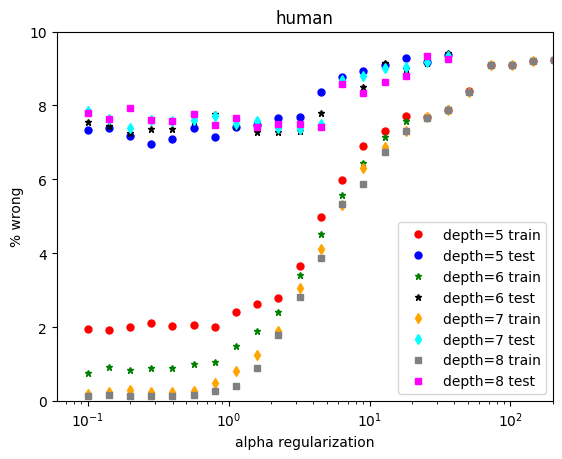

In [59]:
take5b=np.loadtxt('take_open_hum2_xgb_depth5.txt')
take6b=np.loadtxt('take_open_hum2_xgb_depth6.txt')
take7b=np.loadtxt('take_open_hum2_xgb_depth7.txt')
take8b=np.loadtxt('take_open_hum2_xgb_depth8.txt')
plt.plot(take5b[0,:],100*take5b[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5b[0,:],100*take5b[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6b[0,:],100*take6b[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6b[0,:],100*take6b[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7b[0,:],100*take7b[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7b[0,:],100*take7b[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8b[0,:],100*take8b[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8b[0,:],100*take8b[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

Some change similar as for win below, still no clear minimum, still less free paramter should be betetr in general but I should add logistic also since that is easier to extrapolate outside the tested area. 


Now looking on winning.

In [60]:
for i in range(1,9):
    loop_reg(df_win_train.iloc[:,0:9],df_win_train.iloc[:,9], df_win_test.iloc[:,0:9],df_win_test.iloc[:,9],i,0.1,1.414,20,'take_open_win_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1019 seconds
percentage wrong test 10.15
percentage wrong train 8.91 
doing case 1
xgb took 0.0407 seconds
percentage wrong test 10.35
percentage wrong train 8.91 
doing case 2
xgb took 0.0548 seconds
percentage wrong test 10.23
percentage wrong train 8.91 
doing case 3
xgb took 0.042 seconds
percentage wrong test 10.25
percentage wrong train 8.91 
doing case 4
xgb took 0.0449 seconds
percentage wrong test 10.25
percentage wrong train 8.91 
doing case 5
xgb took 0.1914 seconds
percentage wrong test 10.28
percentage wrong train 8.94 
doing case 6
xgb took 0.046 seconds
percentage wrong test 10.28
percentage wrong train 9.04 
doing case 7
xgb took 0.0468 seconds
percentage wrong test 10.3
percentage wrong train 9.04 
doing case 8
xgb took 0.0462 seconds
percentage wrong test 10.28
percentage wrong train 9.04 
doing case 9
xgb took 0.0647 seconds
percentage wrong test 10.23
percentage wrong train 9.05 
doing case 10
xgb took 0.0498 seconds
percentage wrong test 10.

xgb took 0.1309 seconds
percentage wrong test 8.27
percentage wrong train 3.18 
doing case 10
xgb took 0.1107 seconds
percentage wrong test 8.22
percentage wrong train 4.25 
doing case 11
xgb took 0.164 seconds
percentage wrong test 8.04
percentage wrong train 5.15 
doing case 12
xgb took 0.073 seconds
percentage wrong test 8.61
percentage wrong train 6.32 
doing case 13
xgb took 0.0698 seconds
percentage wrong test 8.81
percentage wrong train 7.05 
doing case 14
xgb took 0.0641 seconds
percentage wrong test 9.19
percentage wrong train 7.93 
doing case 15
xgb took 0.0635 seconds
percentage wrong test 9.41
percentage wrong train 8.13 
doing case 16
xgb took 0.0656 seconds
percentage wrong test 9.86
percentage wrong train 8.57 
doing case 17
xgb took 0.0597 seconds
percentage wrong test 10.15
percentage wrong train 9.07 
doing case 18
xgb took 0.0595 seconds
percentage wrong test 10.4
percentage wrong train 9.29 
doing case 19
xgb took 0.0561 seconds
percentage wrong test 10.55
percentag

In [61]:

#now separating test and train by separate games 
for i in range(1,9):
    loop_reg(df_win_feature_train2,df_win_target_train2, df_win_feature_test2,df_win_target_test2,i,0.1,1.414,30,'take_open_win2_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.0983 seconds
percentage wrong test 9.96
percentage wrong train 9.18 
doing case 1
xgb took 0.0455 seconds
percentage wrong test 9.89
percentage wrong train 9.17 
doing case 2
xgb took 0.0625 seconds
percentage wrong test 9.89
percentage wrong train 9.17 
doing case 3
xgb took 0.0488 seconds
percentage wrong test 9.86
percentage wrong train 9.17 
doing case 4
xgb took 0.0496 seconds
percentage wrong test 9.86
percentage wrong train 9.18 
doing case 5
xgb took 0.049 seconds
percentage wrong test 9.84
percentage wrong train 9.18 
doing case 6
xgb took 0.0546 seconds
percentage wrong test 9.79
percentage wrong train 9.17 
doing case 7
xgb took 0.0621 seconds
percentage wrong test 9.74
percentage wrong train 9.17 
doing case 8
xgb took 0.0461 seconds
percentage wrong test 9.66
percentage wrong train 9.12 
doing case 9
xgb took 0.145 seconds
percentage wrong test 9.71
percentage wrong train 9.12 
doing case 10
xgb took 0.0592 seconds
percentage wrong test 9.74
percent

xgb took 0.0704 seconds
percentage wrong test 31.88
percentage wrong train 32.26 
doing case 29
xgb took 0.0547 seconds
percentage wrong test 31.88
percentage wrong train 32.26 
doing case 0
xgb took 0.1872 seconds
percentage wrong test 8.07
percentage wrong train 4.0 
doing case 1
xgb took 0.2867 seconds
percentage wrong test 7.97
percentage wrong train 3.72 
doing case 2
xgb took 0.1433 seconds
percentage wrong test 7.92
percentage wrong train 3.75 
doing case 3
xgb took 0.1821 seconds
percentage wrong test 8.24
percentage wrong train 3.98 
doing case 4
xgb took 0.2265 seconds
percentage wrong test 7.75
percentage wrong train 3.96 
doing case 5
xgb took 0.1468 seconds
percentage wrong test 7.97
percentage wrong train 3.77 
doing case 6
xgb took 0.2336 seconds
percentage wrong test 8.04
percentage wrong train 4.16 
doing case 7
xgb took 0.2109 seconds
percentage wrong test 8.22
percentage wrong train 4.06 
doing case 8
xgb took 0.1367 seconds
percentage wrong test 8.17
percentage wron

xgb took 0.0784 seconds
percentage wrong test 31.88
percentage wrong train 32.26 
doing case 28
xgb took 0.064 seconds
percentage wrong test 31.88
percentage wrong train 32.26 
doing case 29
xgb took 0.0613 seconds
percentage wrong test 31.88
percentage wrong train 32.26 
doing case 0
xgb took 0.2656 seconds
percentage wrong test 8.74
percentage wrong train 0.13 
doing case 1
xgb took 0.2444 seconds
percentage wrong test 8.42
percentage wrong train 0.1 
doing case 2
xgb took 0.2539 seconds
percentage wrong test 8.47
percentage wrong train 0.08 
doing case 3
xgb took 0.4937 seconds
percentage wrong test 8.44
percentage wrong train 0.08 
doing case 4
xgb took 0.3214 seconds
percentage wrong test 8.24
percentage wrong train 0.12 
doing case 5
xgb took 0.5675 seconds
percentage wrong test 8.14
percentage wrong train 0.13 
doing case 6
xgb took 0.2788 seconds
percentage wrong test 8.42
percentage wrong train 0.21 
doing case 7
xgb took 0.3182 seconds
percentage wrong test 8.42
percentage wr

Clearly different bevahiour, test is worse than before at least for small reguluarization. Is likely too extreme to use it since the samplies in it are not randomly ordered (Different computer strategy and also human strategies change likely). I just scramble them in the list. 

Text(0, 0.5, '% wrong')

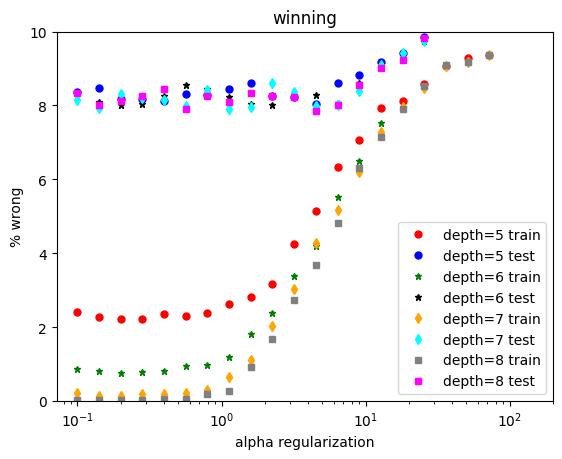

In [62]:
wtake5=np.loadtxt('take_open_win_xgb_depth5.txt')
wtake6=np.loadtxt('take_open_win_xgb_depth6.txt')
wtake7=np.loadtxt('take_open_win_xgb_depth7.txt')
wtake8=np.loadtxt('take_open_win_xgb_depth8.txt')
plt.plot(wtake5[0,:],100*wtake5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wtake5[0,:],100*wtake5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wtake6[0,:],100*wtake6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wtake6[0,:],100*wtake6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wtake7[0,:],100*wtake7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wtake7[0,:],100*wtake7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wtake8[0,:],100*wtake8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wtake8[0,:],100*wtake8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Here at least variance seems to get smaller around a regularziation of 2 maybe indicating that this is the best one. 

That was before rerun with slightly larger sample, thus different split, now it looks different again. 

In general it is likely that the sample is too small to be very reliable, also likely the different data sets are likely too much correlated due to sharing states. 

Text(0, 0.5, '% wrong')

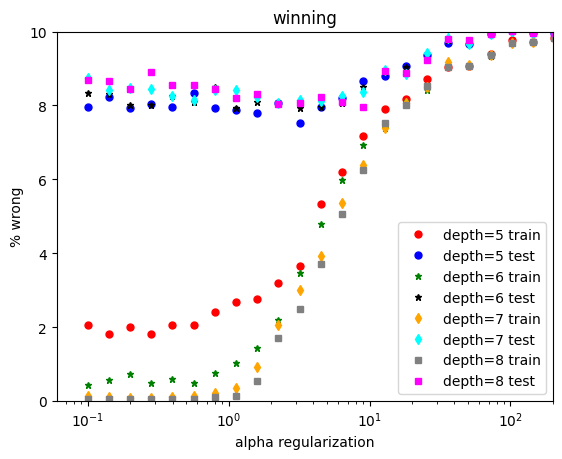

In [63]:
w2take5=np.loadtxt('take_open_win2_xgb_depth5.txt')
w2take6=np.loadtxt('take_open_win2_xgb_depth6.txt')
w2take7=np.loadtxt('take_open_win2_xgb_depth7.txt')
w2take8=np.loadtxt('take_open_win2_xgb_depth8.txt')
plt.plot(w2take5[0,:],100*w2take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(w2take5[0,:],100*w2take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(w2take6[0,:],100*w2take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(w2take6[0,:],100*w2take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(w2take7[0,:],100*w2take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(w2take7[0,:],100*w2take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(w2take8[0,:],100*w2take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(w2take8[0,:],100*w2take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Now bigger differences at least depth 5 looks worse now and also depth 6 needs smaller regularization.

Now with different split it loos even less clear, only really large regulraization is disfavored. 

Since the scatter is partly random, a single dip is likely that and should be ignored. 
There is still no clear minimum. 


Now looking on logistic regression.


[[3742  253]
 [ 333 1670]]


(<AxesSubplot:title={'center':'Logistic train'}>,
 Text(0.5, 1.0, 'Logistic train'))

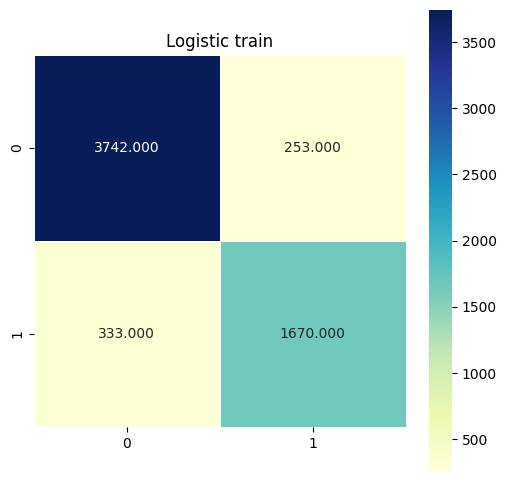

In [64]:
#a few nan remove
df_hum_feature_train2[df_hum_feature_train2.isnull()]=0
df_hum_feature_test2[df_hum_feature_test2.isnull()]=0
df_hum_target_train2[df_hum_target_train2.isnull()]=0
df_hum_target_test2[df_hum_target_test2.isnull()]=0
lopen1=LogisticRegression().fit(df_hum_feature_train2,df_hum_target_train2)
lpred_te=lopen1.predict(df_hum_feature_test2)
lpred_tr=lopen1.predict(df_hum_feature_train2)
lconf_train = confusion_matrix(df_hum_target_train2, lpred_tr)
lconf_test = confusion_matrix(df_hum_target_test2, lpred_te)
print(lconf_train)
plt.figure(figsize = (6, 6));
sns.heatmap(lconf_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("Logistic train")

[[2508  182]
 [ 251 1058]]


(<AxesSubplot:title={'center':'Logistic test'}>,
 Text(0.5, 1.0, 'Logistic test'))

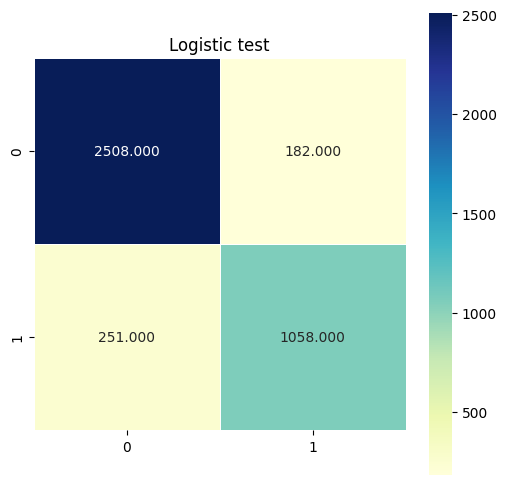

In [65]:

print(lconf_test)
plt.figure(figsize = (6, 6));
sns.heatmap(lconf_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("Logistic test")

In [66]:
print("XGBoost standard")
print(f"wrong in train: {round(100*train_wrong,2)} %")
print(f"wrong in test: {round(100*test_wrong,2)} %")
ltest_wrong=perwrong(lconf_test)
ltrain_wrong=perwrong(lconf_train)
print("Logistic standard")
print(f"wrong in train: {round(100*ltrain_wrong,2)} %")
print(f"wrong in test: {round(100*ltest_wrong,2)} %")

XGBoost standard
wrong in train: 0.83 %
wrong in test: 7.5 %
Logistic standard
wrong in train: 9.77 %
wrong in test: 10.83 %


Text(0, 0.5, 'feature importance')

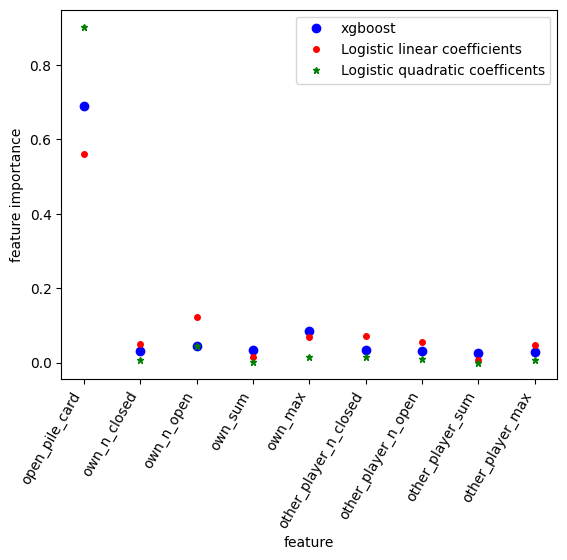

In [67]:

resl=np.zeros((4,9))
for i in range(9):
    resl[0,i]=np.std(df_hum_feature_train2.iloc[:,i])
    resl[1,i]=1/resl[0,i]*lopen1.coef_[0,i]
#relative importance    
resl[2]=abs(resl[1])/sum(abs(resl[1]))    
resl[3]=abs(resl[1]**2)/sum(abs(resl[1]**2)) 
#using coefficents my self sigmoid( dot([val1, val2, 2], lr.coef_.T) )
plt.plot(df_hum_feature_train2.columns,open1.feature_importances_,'o',ms=6,color='blue',label='xgboost') 
plt.plot(df_hum_feature_train2.columns,resl[2],'o',ms=4,color='red',label='Logistic linear coefficients') 
plt.plot(df_hum_feature_train2.columns,resl[3],'*',ms=5,color='green',label='Logistic quadratic coefficents') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")

As expected open card value is the most important one. That is is similar for logistic and xgboost. 

Logistic is worse than xgboost. The difference is much bigger in train but still clear also in test. Likely some non linearity causes it.
Later feature enegreing will be explored to improve it, but for now I just concentrate on xgboost. 

Now looking on action discard, only cases which are not taken open are considered since the others are trivially 0.

In [68]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_hum_feature_train2_discard,df_hum_target_train2_discard,df_hum_feature_test2_discard,df_hum_target_test2_discard,i,0.1,1.414,30,'discard_hum2_xgb_depth'+str(i)+'.txt',False)

doing max depth of 1
doing case 0
xgb took 0.1033 seconds
percentage wrong test 9.83
percentage wrong train 9.01 
doing case 1
xgb took 0.0343 seconds
percentage wrong test 9.8
percentage wrong train 8.93 
doing case 2
xgb took 0.0321 seconds
percentage wrong test 9.65
percentage wrong train 9.01 
doing case 3
xgb took 0.0363 seconds
percentage wrong test 9.61
percentage wrong train 8.96 
doing case 4
xgb took 0.0322 seconds
percentage wrong test 9.65
percentage wrong train 9.03 
doing case 5
xgb took 0.0316 seconds
percentage wrong test 9.61
percentage wrong train 8.98 
doing case 6
xgb took 0.0323 seconds
percentage wrong test 9.72
percentage wrong train 9.05 
doing case 7
xgb took 0.0477 seconds
percentage wrong test 9.87
percentage wrong train 9.01 
doing case 8
xgb took 0.0325 seconds
percentage wrong test 9.57
percentage wrong train 8.91 
doing case 9
xgb took 0.0318 seconds
percentage wrong test 9.8
percentage wrong train 9.13 
doing case 10
xgb took 0.0328 seconds
percentage wr

percentage wrong test 50.26
percentage wrong train 47.66 
doing case 27
xgb took 0.0372 seconds
percentage wrong test 50.26
percentage wrong train 47.66 
doing case 28
xgb took 0.0379 seconds
percentage wrong test 50.26
percentage wrong train 47.66 
doing case 29
xgb took 0.0374 seconds
percentage wrong test 50.26
percentage wrong train 47.66 
doing max depth of 4
doing case 0
xgb took 0.0824 seconds
percentage wrong test 6.78
percentage wrong train 2.48 
doing case 1
xgb took 0.0782 seconds
percentage wrong test 7.27
percentage wrong train 2.51 
doing case 2
xgb took 0.0838 seconds
percentage wrong test 7.16
percentage wrong train 2.31 
doing case 3
xgb took 0.2261 seconds
percentage wrong test 6.97
percentage wrong train 2.51 
doing case 4
xgb took 0.0806 seconds
percentage wrong test 7.01
percentage wrong train 2.41 
doing case 5
xgb took 0.1113 seconds
percentage wrong test 7.01
percentage wrong train 2.51 
doing case 6
xgb took 0.086 seconds
percentage wrong test 7.08
percentage w

xgb took 0.0772 seconds
percentage wrong test 12.21
percentage wrong train 11.51 
doing case 26
xgb took 0.0354 seconds
percentage wrong test 50.26
percentage wrong train 47.66 
doing case 27
xgb took 0.0326 seconds
percentage wrong test 50.26
percentage wrong train 47.66 
doing case 28
xgb took 0.0323 seconds
percentage wrong test 50.26
percentage wrong train 47.66 
doing case 29
xgb took 0.032 seconds
percentage wrong test 50.26
percentage wrong train 47.66 
doing max depth of 7
doing case 0
xgb took 0.1688 seconds
percentage wrong test 7.46
percentage wrong train 0.02 
doing case 1
xgb took 0.2953 seconds
percentage wrong test 7.87
percentage wrong train 0.05 
doing case 2
xgb took 0.1286 seconds
percentage wrong test 7.54
percentage wrong train 0.05 
doing case 3
xgb took 0.1445 seconds
percentage wrong test 7.23
percentage wrong train 0.0 
doing case 4
xgb took 0.3301 seconds
percentage wrong test 7.61
percentage wrong train 0.07 
doing case 5
xgb took 0.1791 seconds
percentage wr

Text(0, 0.5, '% wrong')

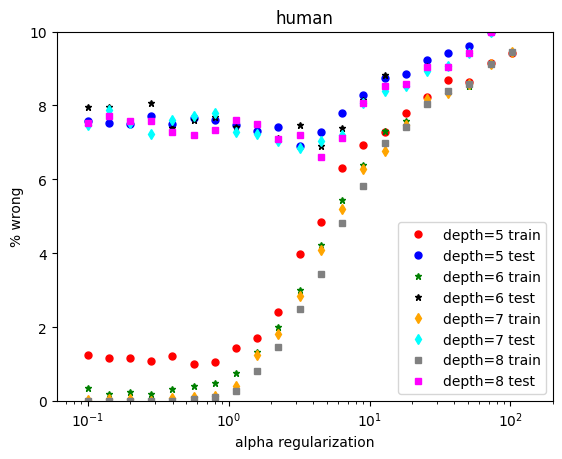

In [69]:
hdis5=np.loadtxt('discard_hum2_xgb_depth5.txt')
hdis6=np.loadtxt('discard_hum2_xgb_depth6.txt')
hdis7=np.loadtxt('discard_hum2_xgb_depth7.txt')
hdis8=np.loadtxt('discard_hum2_xgb_depth8.txt')
plt.plot(hdis5[0,:],100*hdis5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(hdis5[0,:],100*hdis5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(hdis6[0,:],100*hdis6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(hdis6[0,:],100*hdis6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(hdis7[0,:],100*hdis7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(hdis7[0,:],100*hdis7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(hdis8[0,:],100*hdis8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(hdis8[0,:],100*hdis8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

Similar as before differences are small, likely it is not very important which one is chosen. 

In [70]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_win_feature_train2_discard,df_win_target_train2_discard,df_win_feature_test2_discard,df_win_target_test2_discard,i,0.1,1.414,30,'discard_win2_xgb_depth'+str(i)+'.txt',False)

doing max depth of 1
doing case 0
xgb took 0.1217 seconds
percentage wrong test 12.83
percentage wrong train 10.89 
doing case 1
xgb took 0.0361 seconds
percentage wrong test 13.12
percentage wrong train 10.89 
doing case 2
xgb took 0.0512 seconds
percentage wrong test 13.12
percentage wrong train 10.89 
doing case 3
xgb took 0.0356 seconds
percentage wrong test 12.98
percentage wrong train 10.84 
doing case 4
xgb took 0.0335 seconds
percentage wrong test 12.79
percentage wrong train 10.94 
doing case 5
xgb took 0.0342 seconds
percentage wrong test 12.98
percentage wrong train 10.87 
doing case 6
xgb took 0.0692 seconds
percentage wrong test 12.9
percentage wrong train 10.82 
doing case 7
xgb took 0.0516 seconds
percentage wrong test 12.98
percentage wrong train 10.87 
doing case 8
xgb took 0.0992 seconds
percentage wrong test 12.98
percentage wrong train 11.01 
doing case 9
xgb took 0.0842 seconds
percentage wrong test 12.98
percentage wrong train 11.14 
doing case 10
xgb took 0.0623 

xgb took 0.048 seconds
percentage wrong test 43.99
percentage wrong train 44.08 
doing case 29
xgb took 0.0344 seconds
percentage wrong test 43.99
percentage wrong train 44.08 
doing max depth of 4
doing case 0
xgb took 0.1118 seconds
percentage wrong test 11.02
percentage wrong train 3.17 
doing case 1
xgb took 0.102 seconds
percentage wrong test 11.35
percentage wrong train 3.34 
doing case 2
xgb took 0.0839 seconds
percentage wrong test 11.02
percentage wrong train 3.32 
doing case 3
xgb took 0.0974 seconds
percentage wrong test 11.35
percentage wrong train 3.34 
doing case 4
xgb took 0.0835 seconds
percentage wrong test 11.05
percentage wrong train 3.7 
doing case 5
xgb took 0.0817 seconds
percentage wrong test 11.39
percentage wrong train 3.39 
doing case 6
xgb took 0.0835 seconds
percentage wrong test 11.13
percentage wrong train 3.63 
doing case 7
xgb took 0.0866 seconds
percentage wrong test 11.28
percentage wrong train 3.78 
doing case 8
xgb took 0.1065 seconds
percentage wron

xgb took 0.0458 seconds
percentage wrong test 16.45
percentage wrong train 13.87 
doing case 26
xgb took 0.0385 seconds
percentage wrong test 43.99
percentage wrong train 44.08 
doing case 27
xgb took 0.034 seconds
percentage wrong test 43.99
percentage wrong train 44.08 
doing case 28
xgb took 0.034 seconds
percentage wrong test 43.99
percentage wrong train 44.08 
doing case 29
xgb took 0.0665 seconds
percentage wrong test 43.99
percentage wrong train 44.08 
doing max depth of 7
doing case 0
xgb took 0.1468 seconds
percentage wrong test 10.46
percentage wrong train 0.0 
doing case 1
xgb took 0.1511 seconds
percentage wrong test 10.98
percentage wrong train 0.0 
doing case 2
xgb took 0.1485 seconds
percentage wrong test 11.05
percentage wrong train 0.0 
doing case 3
xgb took 0.1522 seconds
percentage wrong test 10.43
percentage wrong train 0.02 
doing case 4
xgb took 0.1482 seconds
percentage wrong test 10.83
percentage wrong train 0.02 
doing case 5
xgb took 0.1842 seconds
percentage 

Text(0, 0.5, '% wrong')

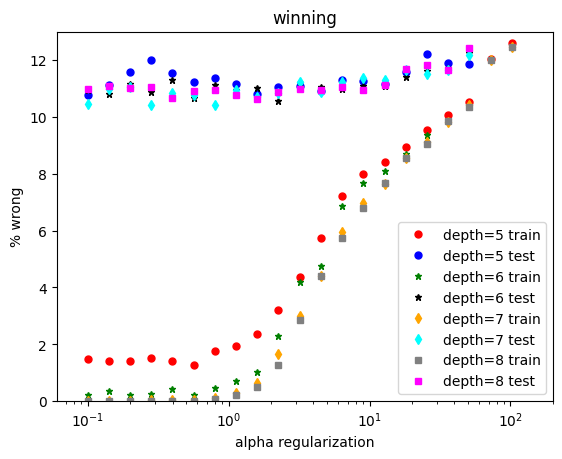

In [71]:
wdis5=np.loadtxt('discard_win2_xgb_depth5.txt')
wdis6=np.loadtxt('discard_win2_xgb_depth6.txt')
wdis7=np.loadtxt('discard_win2_xgb_depth7.txt')
wdis8=np.loadtxt('discard_win2_xgb_depth8.txt')
plt.plot(wdis5[0,:],100*wdis5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wdis5[0,:],100*wdis5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wdis6[0,:],100*wdis6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wdis6[0,:],100*wdis6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wdis7[0,:],100*wdis7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wdis7[0,:],100*wdis7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wdis8[0,:],100*wdis8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wdis8[0,:],100*wdis8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,13)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

There seems to be a minimum, for depth 8, regularization of 9. 
But changes with random draw

Now looking on which card to take, when closed need to be taken that is ignored. 
This is a regression, and closed has the value of 5.07. That means it is similar to 5, that is not true fully but should be the best approximations for small number of cards. 


In [72]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_hum_feature_train2_value,df_hum_target_train2_value,df_hum_feature_test2_value,df_hum_target_test2_value,i,0.1,1.414,30,'value_hum2_xgb_depth'+str(i)+'.txt',True)

doing max depth of 1
doing case 0
xgb took 0.1265 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6293 points
standard deviation of prediction-train 1.5178 points
doing case 1
xgb took 0.0596 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6293 points
standard deviation of prediction-train 1.5178 points
doing case 2
xgb took 0.0473 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.63 points
standard deviation of prediction-train 1.5179 points
doing case 3
xgb took 0.0509 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6286 points
standard deviation of prediction-train 1.518 points
doing case 4
xgb took 0.0624 seconds
standard deviation of test 2.6154 points


xgb took 0.924 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5592 points
standard deviation of prediction-train 1.3616 points
doing case 7
xgb took 0.0861 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5544 points
standard deviation of prediction-train 1.3635 points
doing case 8
xgb took 0.0641 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5535 points
standard deviation of prediction-train 1.3646 points
doing case 9
xgb took 0.0509 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5518 points
standard deviation of prediction-train 1.3682 points
doing case 10
xgb took 0.0457 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5

xgb took 0.0593 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5484 points
standard deviation of prediction-train 1.3252 points
doing case 16
xgb took 0.0458 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5597 points
standard deviation of prediction-train 1.385 points
doing case 17
xgb took 0.0429 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5758 points
standard deviation of prediction-train 1.4086 points
doing case 18
xgb took 0.0443 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5841 points
standard deviation of prediction-train 1.4333 points
doing case 19
xgb took 0.0463 seconds
standard deviation of test 2.6154 points
standard deviation of train 

xgb took 0.045 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6526 points
standard deviation of prediction-train 1.5584 points
doing case 24
xgb took 0.042 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6794 points
standard deviation of prediction-train 1.5898 points
doing case 25
xgb took 0.0513 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.7103 points
standard deviation of prediction-train 1.6224 points
doing case 26
xgb took 0.0438 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.7528 points
standard deviation of prediction-train 1.668 points
doing case 27
xgb took 0.0443 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.

xgb took 0.1785 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6544 points
standard deviation of prediction-train 0.5235 points
doing case 1
xgb took 0.2829 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.643 points
standard deviation of prediction-train 0.5459 points
doing case 2
xgb took 0.1539 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6682 points
standard deviation of prediction-train 0.5853 points
doing case 3
xgb took 0.231 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.668 points
standard deviation of prediction-train 0.5612 points
doing case 4
xgb took 0.443 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408 

xgb took 0.1905 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6619 points
standard deviation of prediction-train 0.3979 points
doing case 9
xgb took 0.1837 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6491 points
standard deviation of prediction-train 0.4309 points
doing case 10
xgb took 0.1739 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.6551 points
standard deviation of prediction-train 0.4842 points
doing case 11
xgb took 0.1808 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.639 points
standard deviation of prediction-train 0.5569 points
doing case 12
xgb took 0.1647 seconds
standard deviation of test 2.6154 points
standard deviation of train 2

xgb took 0.1112 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5728 points
standard deviation of prediction-train 1.1377 points
doing case 17
xgb took 0.0842 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5642 points
standard deviation of prediction-train 1.2443 points
doing case 18
xgb took 0.073 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5631 points
standard deviation of prediction-train 1.3369 points
doing case 19
xgb took 0.085 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.5408  points
standard deviation of prediction-test 1.5748 points
standard deviation of prediction-train 1.386 points
doing case 20
xgb took 0.0606 seconds
standard deviation of test 2.6154 points
standard deviation of train 2.

Text(0, 0.5, 'standard deviation [points]')

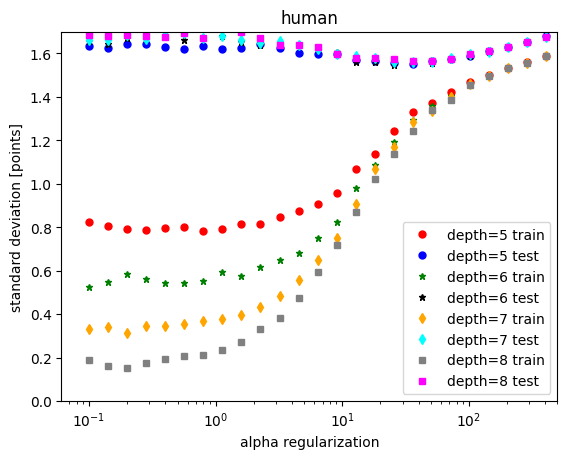

In [73]:
hval5=np.loadtxt('value_hum2_xgb_depth5.txt')
hval6=np.loadtxt('value_hum2_xgb_depth6.txt')
hval7=np.loadtxt('value_hum2_xgb_depth7.txt')
hval8=np.loadtxt('value_hum2_xgb_depth8.txt')
plt.plot(hval5[0,:],hval5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(hval5[0,:],hval5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(hval6[0,:],hval6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(hval6[0,:],hval6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(hval7[0,:],hval7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(hval7[0,:],hval7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(hval8[0,:],hval8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(hval8[0,:],hval8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,500)
plt.ylim(0,1.7)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("standard deviation [points]")

Minimum is clearer here. Is understandable that rgression is easier than continuous nature means that for same row number there is more information.

Now winnning case. 

In [74]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_win_feature_train2_value,df_win_target_train2_value,df_win_feature_test2_value,df_win_target_test2_value,i,0.1,1.414,30,'value_win2_xgb_depth'+str(i)+'.txt',True)

doing max depth of 1
doing case 0
xgb took 0.1151 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.539 points
standard deviation of prediction-train 1.4132 points
doing case 1
xgb took 0.0378 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5381 points
standard deviation of prediction-train 1.4131 points
doing case 2
xgb took 0.0351 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5381 points
standard deviation of prediction-train 1.4132 points
doing case 3
xgb took 0.0396 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5379 points
standard deviation of prediction-train 1.4132 points
doing case 4
xgb took 0.0329 seconds
standard deviation of test 2.7461 point

xgb took 0.0666 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5268 points
standard deviation of prediction-train 1.2869 points
doing case 7
xgb took 0.0447 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5178 points
standard deviation of prediction-train 1.292 points
doing case 8
xgb took 0.0442 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5164 points
standard deviation of prediction-train 1.2896 points
doing case 9
xgb took 0.0467 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5069 points
standard deviation of prediction-train 1.2896 points
doing case 10
xgb took 0.0603 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6

xgb took 0.0678 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5054 points
standard deviation of prediction-train 1.2059 points
doing case 15
xgb took 0.0629 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.4984 points
standard deviation of prediction-train 1.2405 points
doing case 16
xgb took 0.0514 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5001 points
standard deviation of prediction-train 1.2968 points
doing case 17
xgb took 0.0506 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.4937 points
standard deviation of prediction-train 1.3142 points
doing case 18
xgb took 0.046 seconds
standard deviation of test 2.7461 points
standard deviation of train 

xgb took 0.0474 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.56 points
standard deviation of prediction-train 1.4759 points
doing case 25
xgb took 0.0444 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5848 points
standard deviation of prediction-train 1.5105 points
doing case 26
xgb took 0.0435 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.6341 points
standard deviation of prediction-train 1.561 points
doing case 27
xgb took 0.0407 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.7021 points
standard deviation of prediction-train 1.6249 points
doing case 28
xgb took 0.0407 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.

xgb took 0.1624 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.6027 points
standard deviation of prediction-train 0.4898 points
doing case 3
xgb took 0.3639 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5954 points
standard deviation of prediction-train 0.4849 points
doing case 4
xgb took 0.257 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.6097 points
standard deviation of prediction-train 0.4834 points
doing case 5
xgb took 0.1444 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.6021 points
standard deviation of prediction-train 0.4732 points
doing case 6
xgb took 0.1838 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.62

doing case 10
xgb took 0.1783 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.576 points
standard deviation of prediction-train 0.4324 points
doing case 11
xgb took 0.176 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5693 points
standard deviation of prediction-train 0.5046 points
doing case 12
xgb took 0.1853 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5704 points
standard deviation of prediction-train 0.5827 points
doing case 13
xgb took 0.1469 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5414 points
standard deviation of prediction-train 0.7046 points
doing case 14
xgb took 0.1466 seconds
standard deviation of test 2.7461 points
standard deviat

xgb took 0.2901 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.4973 points
standard deviation of prediction-train 1.1851 points
doing case 18
xgb took 0.1939 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.491 points
standard deviation of prediction-train 1.2723 points
doing case 19
xgb took 0.0844 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.4994 points
standard deviation of prediction-train 1.3215 points
doing case 20
xgb took 0.0727 seconds
standard deviation of test 2.7461 points
standard deviation of train 2.6204  points
standard deviation of prediction-test 1.5039 points
standard deviation of prediction-train 1.3488 points
doing case 21
xgb took 0.0927 seconds
standard deviation of test 2.7461 points
standard deviation of train 

Text(0, 0.5, 'standard deviation [points]')

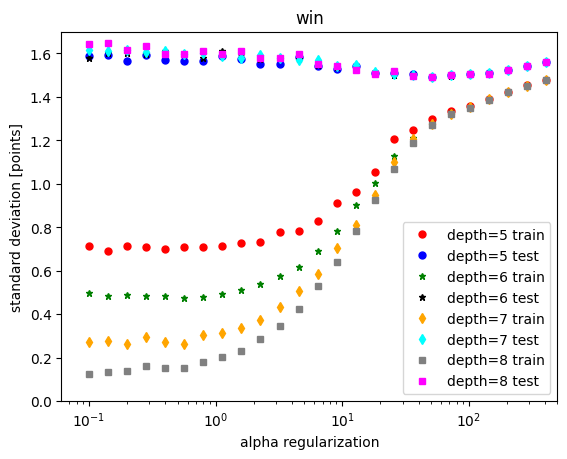

In [75]:
wval5=np.loadtxt('value_win2_xgb_depth5.txt')
wval6=np.loadtxt('value_win2_xgb_depth6.txt')
wval7=np.loadtxt('value_win2_xgb_depth7.txt')
wval8=np.loadtxt('value_win2_xgb_depth8.txt')
plt.plot(wval5[0,:],wval5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wval5[0,:],wval5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wval6[0,:],wval6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wval6[0,:],wval6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wval7[0,:],wval7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wval7[0,:],wval7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wval8[0,:],wval8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wval8[0,:],wval8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,500)
plt.ylim(0,1.7)
plt.xlabel("alpha regularization")
plt.title("win")
plt.ylabel("standard deviation [points]")

Now I determine the best option and let it run again and save it then.

I define a function for it. 
As visisble in the plots above, there is no clear minimum in case of the classification cases but many choices get a similar floor value. The actual minum is likely dependent on the eaxct test sample and thus not necessary reliable. To chose a more relaible, the following procedure is used. Quantile in the test sample are calcauted from 5% onwards in steps of 10%. For that only max depth 5 and larger is used because the minium is always is those for classification. 
This qunatiles are then used to define the allowed values of the test metric, it is always the one of 15%, it is enlarged, when the quantile slope is getting lower still outside of it. 
That define the maximum alloed metric value, it is then used the larged regularization with the smallest possible max depth. 

In [267]:
#find (and run) best xgbosst (regression and classification) of a collection
#parameters are list of the files with the metric and parameters, train_features, train_targtes, whether regression (default) or classification
def find_best(list_inputs,feature_train,target_train,output_file_name,regression=True):
    a=np.loadtxt(list_inputs[0])
    all_metrics=np.zeros((5,len(list_inputs),a.shape[1]))

    for i in range(len(list_inputs)):
        a=np.loadtxt(list_inputs[i])
        all_metrics[0:4,i,:]=a
    #first just using minimum in data
    s1=np.unravel_index(np.argmin(all_metrics[3,:,:]),all_metrics[3,:,:].shape)
    s2=np.argsort(all_metrics[3,:,:],axis=None)
    if regression==True:
        #to the minium seems fine for regression 
        print(f"minimum of {round(all_metrics[3,s1[0],s1[1]],2)} points is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
        reg4=XGBRegressor(max_depth=int(all_metrics[1,s1[0],s1[1]]),reg_alpha=all_metrics[0,s1[0],s1[1]]).fit(feature_train, target_train)
        #and save it
        reg4.save_model(output_file_name)
    else:
        #for classification the minimum seems not good defined
        #but many choices get a similar floor value. The actual minum is likely dependent on the eaxct test sample and thus not necessary reliable. To chose a more relaible, the following procedure is used. Quantile in the test sample are calcauted from 5% onwards in steps of 10%. For that only max depth 5 and larger is used because the minium is always is those for classification. 
        #This quantiles are then used to define the allowed values of the test metric, it is always the one of 15%, it is enlarged, when the quantile slope is getting lower still outside of it. 
        #That define the maximum allowed metric value
        r=np.quantile(all_metrics[3,4:8,:],[0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
        print("quantiles of larger max depth half")
        print(r)
        #use them until they get larger again but at least the first 15%
        max_wrong=r[1]
        c=0
        while r[c+2]-r[c+1] <=(r[c+1]-r[0])/(1+c):
            max_wrong=r[c+2]
            c+=1
        print(f"accepted percentage  is {round(100*max_wrong,2)}")  
        #get maximum alpha within this limit, by increasing in alpha in loop start value is mimumum
        #loop goes the other way in max_depth to have this as small as possible
        value=[all_metrics[1,s1[0],s1[1]],all_metrics[0,s1[0],s1[1]]]
        per=all_metrics[3,s1[0],s1[1]]
        for j in range(all_metrics.shape[2]): 
            for i in range(all_metrics.shape[1]):
                if all_metrics[3,7-i,j]<=max_wrong:
                    value[0]=all_metrics[1,7-i,j]
                    value[1]=all_metrics[0,7-i,j] 
                    per=all_metrics[3,7-i,j] 
        print(f"minimum of {round(100*all_metrics[3,s1[0],s1[1]],2)} % is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
        print(f"used of {round(100*per,2)} % is at alpha={round(value[1],2)} and max_depth={int(value[0])}")        
        reg4=XGBClassifier(max_depth=int(value[0]),reg_alpha=value[1]).fit(feature_train, target_train)
        #and save it
        reg4.save_model(output_file_name)        

Now running it for all the options of three targets and two different samples each. 

In [268]:
list_val_hum=['value_hum2_xgb_depth1.txt','value_hum2_xgb_depth2.txt','value_hum2_xgb_depth3.txt','value_hum2_xgb_depth4.txt','value_hum2_xgb_depth5.txt','value_hum2_xgb_depth6.txt','value_hum2_xgb_depth7.txt','value_hum2_xgb_depth8.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_val_hum,df_hum_feature_train2_value,df_hum_target_train2_value,'xgb_value_hum1.json')

minimum of 1.54 points is at alpha=18.06 and max_depth=4


In [269]:
list_val_win=['value_win2_xgb_depth1.txt','value_win2_xgb_depth2.txt','value_win2_xgb_depth3.txt','value_win2_xgb_depth4.txt','value_win2_xgb_depth5.txt','value_win2_xgb_depth6.txt','value_win2_xgb_depth7.txt','value_win2_xgb_depth8.txt']
#find_best(list_val_win,df_win_feature_train2_value,df_win_target_train2_value,'xgb_value_win1.json')

minimum of 1.49 points is at alpha=51.06 and max_depth=5


In [270]:
list_op_hum=['take_open_hum2_xgb_depth1.txt','take_open_hum2_xgb_depth2.txt','take_open_hum2_xgb_depth3.txt','take_open_hum2_xgb_depth4.txt','take_open_hum2_xgb_depth5.txt','take_open_hum2_xgb_depth6.txt','take_open_hum2_xgb_depth7.txt','take_open_hum2_xgb_depth8.txt']
#find_best(list_op_hum,df_hum_feature_train2,df_hum_target_train2,'xgb_open_hum1.json',regression=False)

quantiles of larger max depth half
[0.07276819 0.07426857 0.07576894 0.07776944 0.08732183 0.09211053
 0.10727682 0.10777694 0.11052763 0.32733183]
accepted percentage  is 7.58
minimum of 6.95 % is at alpha=0.28 and max_depth=5
used of 7.5 % is at alpha=4.52 and max_depth=7


In [271]:
list_op_win=['take_open_win2_xgb_depth1.txt','take_open_win2_xgb_depth2.txt','take_open_win2_xgb_depth3.txt','take_open_win2_xgb_depth4.txt','take_open_win2_xgb_depth5.txt','take_open_win2_xgb_depth6.txt','take_open_win2_xgb_depth7.txt','take_open_win2_xgb_depth8.txt']
#find_best(list_op_win,df_win_feature_train2,df_win_target_train2,'xgb_open_win1.json',regression=False)

quantiles of larger max depth half
[0.07920299 0.08069738 0.08219178 0.08418431 0.08719801 0.09310087
 0.09937733 0.0996264  0.1003736  0.31880448]
accepted percentage  is 8.22
minimum of 7.52 % is at alpha=3.2 and max_depth=5
used of 7.97 % is at alpha=9.03 and max_depth=8


In [272]:
list_dis_hum=['discard_hum2_xgb_depth1.txt','discard_hum2_xgb_depth2.txt','discard_hum2_xgb_depth3.txt','discard_hum2_xgb_depth4.txt','discard_hum2_xgb_depth5.txt','discard_hum2_xgb_depth6.txt','discard_hum2_xgb_depth7.txt','discard_hum2_xgb_depth8.txt']
#find_best(list_dis_hum,df_hum_feature_train2_discard,df_hum_target_train2_discard,'xgb_discard_hum1.json',regression=False)

quantiles of larger max depth half
[0.07081763 0.07341748 0.07526375 0.07673323 0.08104748 0.09042954
 0.09984928 0.11152977 0.12207988 0.50263753]
accepted percentage  is 7.67
minimum of 6.59 % is at alpha=4.52 and max_depth=8
used of 7.65 % is at alpha=6.39 and max_depth=4


In [273]:
list_dis_win=['discard_win2_xgb_depth1.txt','discard_win2_xgb_depth2.txt','discard_win2_xgb_depth3.txt','discard_win2_xgb_depth4.txt','discard_win2_xgb_depth5.txt','discard_win2_xgb_depth6.txt','discard_win2_xgb_depth7.txt','discard_win2_xgb_depth8.txt']
#find_best(list_dis_win,df_win_feature_train2_discard,df_win_target_train2_discard,'xgb_discard_win1.json',regression=False)

quantiles of larger max depth half
[0.1064695  0.10900185 0.11007394 0.11127542 0.11312384 0.11661738
 0.13778189 0.15637708 0.16451017 0.43992606]
accepted percentage  is 11.13
minimum of 10.43 % is at alpha=0.28 and max_depth=7
used of 11.09 % is at alpha=12.77 and max_depth=6


Now the used values seem reasonable are not so likely overfit. 

In [275]:
print(df_hum_feature_train2.columns)

Index(['open_pile_card', 'own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max'],
      dtype='object')


In [202]:
res=df_hum.groupby(df_hum.open_pile_card).mean()

In [55]:
print(res)

                acting_player  number_of_-2_in_open  number_of_-1_in_open  \
open_pile_card                                                              
-2.0                      0.0              0.057143              0.114286   
-1.0                      0.0              0.031496              0.062992   
 0.0                      0.0              0.074380              0.119835   
 1.0                      0.0              0.037815              0.084034   
 2.0                      0.0              0.044510              0.109792   
 3.0                      0.0              0.045024              0.101896   
 4.0                      0.0              0.052459              0.122951   
 5.0                      0.0              0.037196              0.125894   
 6.0                      0.0              0.048387              0.129032   
 7.0                      0.0              0.032297              0.141148   
 8.0                      0.0              0.043735              0.140662   

In [118]:
list_f=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_f.sort()
games_stat=np.zeros((4,len(list_f)))
for i in range(len(list_f)):
    print(i)
    a=np.loadtxt(list_f[i])
    print(np.mean(a[1,:]))
    df2=pd.DataFrame(data = a.T, index=range(a.shape[1]),columns = columns2)
    games_stat[0,i]=i
    games_stat[1,i]=np.mean(a[1,:])
    games_stat[2,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].mean()
    games_stat[3,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].std()/np.sqrt(df2.iloc[:,44][(df2.iloc[:,44]!=30)].sum())
    print(games_stat[2,i])
#46 to  50 one run of game with more global variables  
#and 51 to 53

0
6.130434782608695
4.2875
1
6.63013698630137
4.666666666666667
2
6.15
4.706896551724138
3
7.976470588235294
7.861538461538461
4
6.885416666666667
4.552238805970149
5
7.571428571428571
7.5055555555555555
6
8.875
8.91764705882353
7
6.611111111111111
4.956521739130435
8
7.876712328767123
7.649122807017544
9
6.657534246575342
4.790697674418604
10
6.260273972602739
4.948717948717949
11
6.753968253968254
5.232876712328767
12
7.01010101010101
5.734375
13
6.040404040404041
4.333333333333333
14
7.261363636363637
5.446153846153846
15
8.232558139534884
8.285714285714286
16
6.077669902912621
5.206896551724138
17
6.972222222222222
5.185714285714286
18
8.378947368421052
7.733333333333333
19
8.309734513274336
8.568181818181818
20
8.065573770491802
8.644444444444444
21
8.785714285714286
8.423728813559322
22
6.65934065934066
4.966666666666667
23
6.726190476190476
5.0
24
6.2745098039215685
4.3
25
6.598639455782313
4.963636363636364
26
8.292307692307693
6.964285714285714
27
8.722222222222221
7.908163265

In [107]:
print(columns2)
print(a.shape)

['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker', 

discard_value


Text(0, 0.5, 'points')

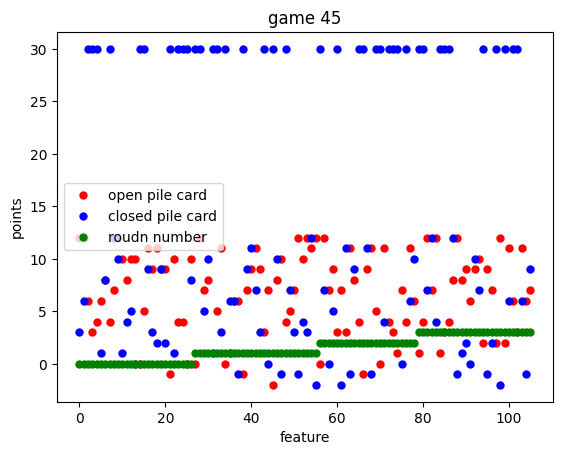

In [108]:
print(columns2[44])
plt.plot(range(106),a[1,:],'o',ms=5,color='red',label='open pile card') 
plt.plot(range(106),a[44,:],'o',ms=5,color='blue',label='closed pile card') 
plt.plot(range(106),a[51,:],'o',ms=5,color='green',label='roudn number') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("game 45")
plt.xlabel("feature")
plt.ylabel("points")

Seem to that create has some problem in games for sure, likely also rounds. 

Text(0, 0.5, 'points')

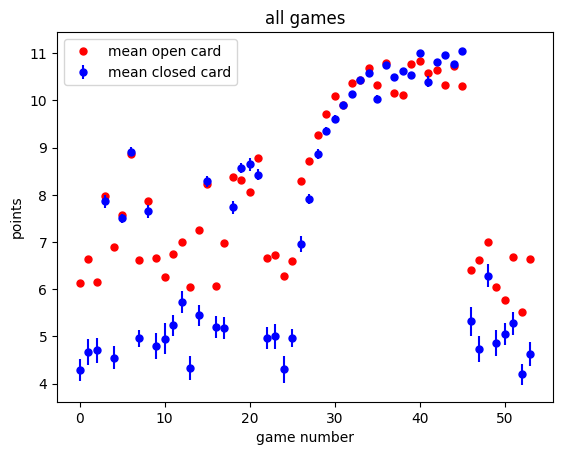

In [120]:
plt.plot(games_stat[0,:],games_stat[1,:],'o',ms=5,color='red',label='mean open card') 
plt.errorbar(games_stat[0,:],games_stat[2,:], yerr=games_stat[3,:],ms=5, fmt='o',color='blue',label='mean closed card')
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("all games")
plt.xlabel("game number")
plt.ylabel("points")

Forgotten global caused the piles to worsen. Looks now good. Closed should better be better than open because open gets the too bad cards of closed and deck. Average shoudl be 5.07 in closed deviation from it is likely just random. 

In [99]:
pile_closed=Pile('create_closed',False)
print(pile_closed)

Pile has length of 150 Cards and is closed. Its position is at [20, 10]


Text(0, 0.5, 'points')

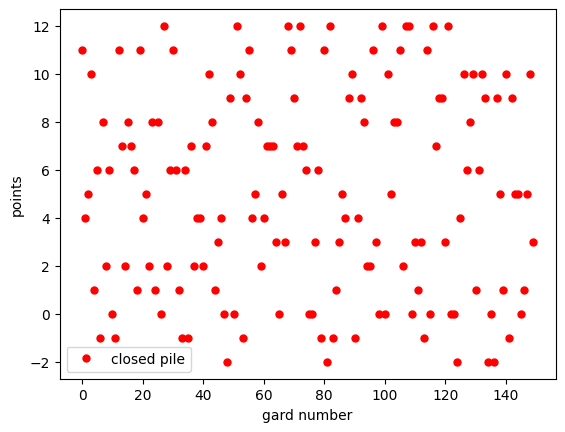

In [105]:
res=np.zeros((2,150))
for i in range(150):
    res[0,i]=i
    res[1,i]=pile_closed.list_cards[i].number
plt.plot(res[0,:],res[1,:],'o',ms=5,color='red',label='closed pile') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("")
plt.xlabel("card number")
plt.ylabel("points")

In [121]:
print(a[44,:])

[ 3.  6. 30. 30. 30.  1.  8. 30. 12. 10.  1.  4.  5.  0. 30. 30.  9.  3.
  2.  9.  2. 30.  1. 30. 30. 30.  8. 30. 30.  5. 10. 30. 30.  3. 30.  6.
  6. -1. 30.  9. 11.  7.  3. 30.  0. 30. 10. -1. 30.  7.  3. -1.  4.  3.
 12. -2. 30.  7.  0.  5. 30. -2. 11. -1.  9. 30. 30. 11. -1. 30. 30.  4.
 30. 30. 30.  0. 30.  6. 10. 30. 30.  7. 12.  4. 30. 30. 30. 12. -1.  1.
  2.  0. 10.  7. 30. -1.  2. 30. -2. 30.  6. 30. 30.  6. -1.  9.]
